# ML Auto N With New Linear Regression.ipynb

## Gyors link
[set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)

**ToDo:**

Az eredeti cikkre alapozott Linearis egyenlet számítást fogom használni.

Ehhez csináltam egy másik cars.py modult carswithgoodregression.py néven.

<font color="#FF0000">Ebben a notebookban ezt az új modult fogom használni.</font>

Shift + Tab ( a signaturához )

Shift + B ( sandbox )

# Korábbi PNG fájlok törlése

In [154]:
!rm *.png
!rm *.zip

rm: cannot remove '*.zip': No such file or directory


In [155]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [156]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

import os
import sys
import pickle
import importlib

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')


In [4]:
%%capture
!rm MLPPlot.py
!rm environments.py
!rm plotters.py
!rm debils.py
!rm cars.py
!rm carswithgoodregression.py
!rm dev.py
!rm *.py.*
!rm *.pkl
!rm *.png

!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/debils.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/environments.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/plotters.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/storages.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/carswithgoodregression.py
!wget --no-cache https://raw.githubusercontent.com/JoDeMiro/TMP/main/dev.py

# !curl -H 'Pragma: no-cache' https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py --output cars.py


In [85]:
import subprocess

result = subprocess.run(["wget", "--no-cache",
                         "--backups=1",
                         "https://raw.githubusercontent.com/JoDeMiro/TMP/main/cars.py"],
                        stderr=subprocess.PIPE, stdout=subprocess.PIPE)
# print(result.stderr.decode("utf-8"))

In [157]:
import MLPPlot
from MLPPlot import DrawNN

from debils import Printer
from environments import Road
from plotters import PostPlotter, Plotter
from storages import Storage
# from cars import TestCar, Car
from carswithgoodregression import TestCar, Car
import dev

# Set

<a name="set"></a> set [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)


In [158]:
# A Road osztály az environment.py modulban van

# Sok féle utat lehet létrehozni a tesztekhez, a Road objektumnak van egy show metodusa amivel ki lehet plottolni az utat.

# -

# test_road = Road(wide = 124, length = 1000)
# test_road.show(height=5)

# -

# test_road = Road(wide = 124, length = 1000)
# test_road.wizu()

# -

# Mindeféle dolgkokat kipróbálunk az 'úttal' kapcsolatban, akár úgy, hogy az egyik, vagy mindkét szenzor determinisztikus
# kapcsolatban van a cél változóval, vagy úgy, hogy ne legyen determinisztikus a kapcsolat, alább látható néhány próba

## Experiment

<a name="exp"></a> [set](#set) exp [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)


480
1920
# ----------------------------------------- road Description -----------------------------------------
  		 road.length =  2400
  		 minimum slope (descending) =  -25.752297723857254
  		 maximum slope (ascending)  =   22.525548489697485
# ----------------------------------------------------------------------------------------------------
---------------------------- HELLO --------------------------
---------------------- ÚJ AUTO VAGYOK :) -----------------------
self.distance_right_from_wall =  -35.189660093415114
self.distance_left_from_wall  =  -64.81033990658489


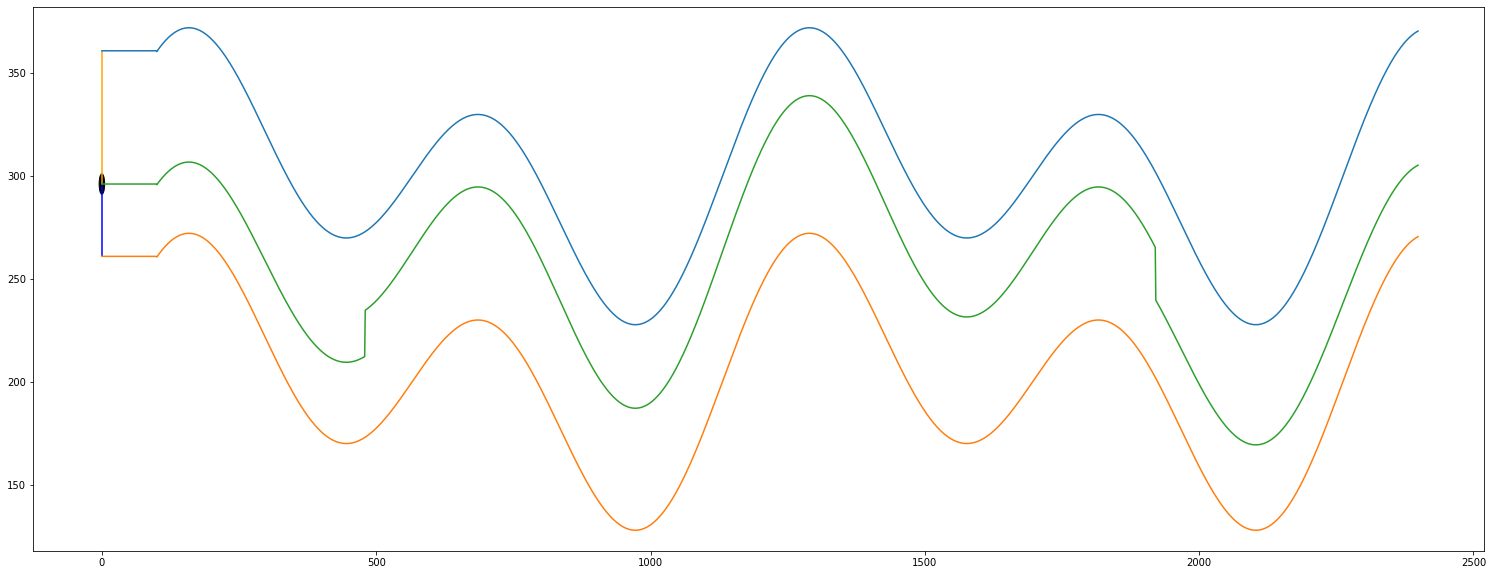

In [159]:
# road = Road(wide = 100, length = 1200, type = 99, v = 50, shift = 3)       # shift  left
# road = Road(wide = 100, length = 1200, type = 98, v = 50, strech = 3)      # strech(main wave)  left
# road = Road(wide = 100, length = 1200, type = 97, v = 50, strech = 300)    # strech(main wave)  left
# road = Road(wide = 100, length = 1200, type = 96, v = 50, strech = 2)      # strech(all wave)  left

# road = Road(wide = 200, length = 1200, type = 95, v = 50, shift = 100, strech = 0)      # center = (l + r) / 2
# road = Road(wide = 200, length = 2400, type = 95, v = 50, shift = 100, strech = 0)      # center = (l + r) / 2
# road = Road(wide = 200, length = 2400, type = 95, v = 50, shift = 100, strech = 10)     # center = (l + r) / 2
# road = Road(wide = 200, length = 2400, type = 95, v = 50, shift = 100, strech = 20)     # center = (l + r) / 2

# Ez már nem determinisztikus (b = 100) --> folyamatosan emeli a középvonalat

# Kiiktattam a középső szenzort -> ezekhet a kísérletekhez
# road = Road(wide = 200, length = 2400, type = 89, v = 50, shift = 100, strech = 20, noise=0, b=100)    # linear elevation

# Concept drift :)
# road = Road(wide = 100, length = 2400, type = 79, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2) # cdr = con.drf.rate

# Concept drift két drifttel :)
road = Road(wide = 100, length = 2400, type = 78, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2) # cdr = con.drf.rate

# Random Walk :)
# road = Road(wide = 100, length = 1200, type = 69, v = 50, strech = 2)

# mindez a sok jó eredmény azért lehetséges, mert az út maga még mindíg determinisztikus kapcsolatban áll az egyik fallal (!)
plotter = Plotter()
storage = Storage()
printer = Printer()
auto = Car(road, plotter, storage, printer)

auto.sensor_center_enable = False                 # <------------ kikapcsoltam a középső szenzort

auto.calculate_distances()
auto.plot_history(1)

# Car Plot Setup

<a name="cpl"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [tst](#tst)


In [160]:
auto.plot_frequency = 27
auto.plot_detailed_frequency = 4 #32
auto.plot_history_flag = 0                          # 0 - disable, 1 - plot, 2 - save, 3 - both
auto.plot_investigation_flag = 0                    # 0 - disable, 1 - plot, 2 - save, 3 - both   > detailed_frequency
auto.plot_before_after_sensor_values_flag = 0       # 0 - disable, 1 - plot, 2 - save, 3 - both
auto.plot_before_after_sensor_estimation_flag = 0   # 0 - disable, 1 - plot, 2 - save, 3 - both
auto.plot_state_space_discover_flag = 0             # 0 - disable, 1 - plot, 2 - save, 3 - both
auto.plot_trace_flag = 0                            # 0 - disable, 1 - plot, 2 - save, 3 - both
auto.plotter_flag = 0                               # 0 - disable, 1 - plot, 2 - save, 3 - both   > timeline sensors
auto.plotter_switch = [6]                           # [] - none, [1], [1,2], [1,3], [99] - all
auto.plotter_mlp_flag = 0                           # 0 - disable, 1 - plot, 2 - save, 3 - both

# Run

<a name="run"></a> [set](#set) [exp](#exp) run [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)


In [161]:
auto.mlp

# A létrehozott auto objektumnak van egy mlp attributuma ami maga a scikit learn MLPRegressor obektum egy neurális háló

# Ezen fogom átállítani a Neuronok számát és nézem meg az eredményeket

# auto.mlp.get_params()


MLPRegressor(activation='tanh', early_stopping=True, hidden_layer_sizes=(10, 5),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=98765000,
             random_state=1, shuffle=False, verbose=True, warm_start=True)

In [189]:
!rm *.png

road = Road(wide = 100, length = 2400, type = 78, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2) # cdr = con.drf.rate
plotter = Plotter()
storage = Storage()
printer = Printer()
auto = Car(road, plotter, storage, printer)
auto.sensor_center_enable = False                # <-- középső senzort offoljuk

# Set hidden_layer_sizes                         # <-- overridolom a gyári belállítások az a biztos
auto.mlp.hidden_layer_sizes = (10, 8)
auto.mlp.early_stopping = False
auto.mlp.validation_fraction = 0.0
auto.mlp.batch_size = 20                         # <-- 200 = 'auto'  --> az adaptivitásra lesz hatással
auto.mlp.shuffle = False
auto.mlp.max_iter = 1
auto.mlp.solver = 'sgd'

auto.calculate_distances()
# auto.plot_history(1)


auto.printer._ac = False
auto.printer._ba = False
auto.printer._bs = False
auto.printer._db = False
auto.printer._dc = False
auto.printer._er = False
auto.printer._in = False
auto.printer._lr = False
auto.printer._nf = False
auto.printer._nn = False
auto.printer._sr = False
auto.printer._ta = False
auto.printer._ut = False


# kikapcsolhatóvá tettem, hogy figyelmbe vegye-e az action=0 értékeket is a before afterben vagy ne

auto.action_zero_is_allowed = False      # False
auto.run(2368, silent = True) #31, 2368

# -------- IF i % 3 == 0 ------ ekkor is meg van hivva valahol a before.append() és olynakor is lefut amikor az 
# action = 0 tehát ezért kerülnek be 0-ák ebbe a kurvába

rm: cannot remove '*.png': No such file or directory
480
1920
# ----------------------------------------- road Description -----------------------------------------
  		 road.length =  2400
  		 minimum slope (descending) =  -25.752297723857254
  		 maximum slope (ascending)  =   22.525548489697485
# ----------------------------------------------------------------------------------------------------
---------------------------- HELLO --------------------------
---------------------- ÚJ AUTO VAGYOK :) -----------------------
Iteration 1, loss = 0.42742467
Iteration 2, loss = 0.29669408
Iteration 3, loss = 0.22128802
Iteration 4, loss = 0.19688313
Iteration 5, loss = 0.13519723
Iteration 6, loss = 0.09453610
Iteration 7, loss = 0.07922800
[[296.20679813 -64.81033991   0.         -35.18966009]
 [297.20679813 -63.81033991   0.         -36.18966009]
 [296.20679813 -64.81033991   0.         -35.18966009]
 [295.20679813 -65.81033991   0.         -34.18966009]
 [296.20679813 -64.81033991   0. 

limit_output extension: Maximum message size of 12000 exceeded with 38195 characters

[set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)

In [190]:
print(auto.regression_right.get_params())
print(auto.regression_right.coef_)
print(auto.regression_right.intercept_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
[[1.00039948 5.42386063]]
[-0.02980351]


In [191]:
# auto.x
# auto.y
print(len(auto.before))
# auto.before

1383


In [192]:
print(len(auto.after))
# auto.after

1383


In [193]:
# print('center.coef_ = ', auto.regression_center.coef_)
print('right.coef_  = ', auto.regression_right.coef_)
print('left.coef_   = ', auto.regression_left.coef_)
# print('center.intercept_ = ', auto.regression_center.intercept_)
print('right.intercept_  = ', auto.regression_right.intercept_)
print('left.intercept_   = ', auto.regression_left.intercept_)
# print('center int enable = ', auto.regression_center.fit_intercept)
print('right int enable  = ', auto.regression_right.fit_intercept)
print('left  int enable  = ', auto.regression_left.fit_intercept)

right.coef_  =  [[1.00039948 5.42386063]]
left.coef_   =  [[ 0.99855327 -3.99364137]]
right.intercept_  =  [-0.02980351]
left.intercept_   =  [-0.112483]
right int enable  =  True
left  int enable  =  True


self.distance_right_from_wall =  -38.691230910935985
self.distance_left_from_wall  =  -61.308769089064015


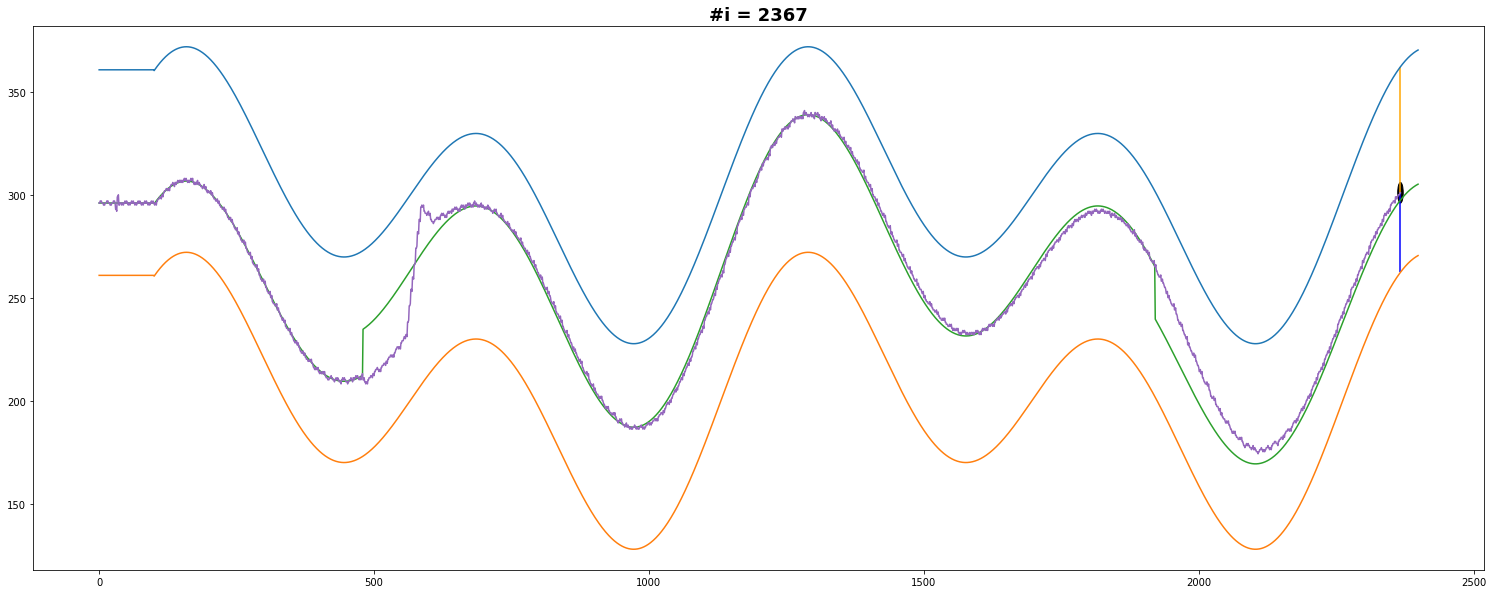

In [194]:
auto.plot_history(1)

self.distance_right_from_wall =  -39.691230910935985
self.distance_left_from_wall  =  -60.308769089064015


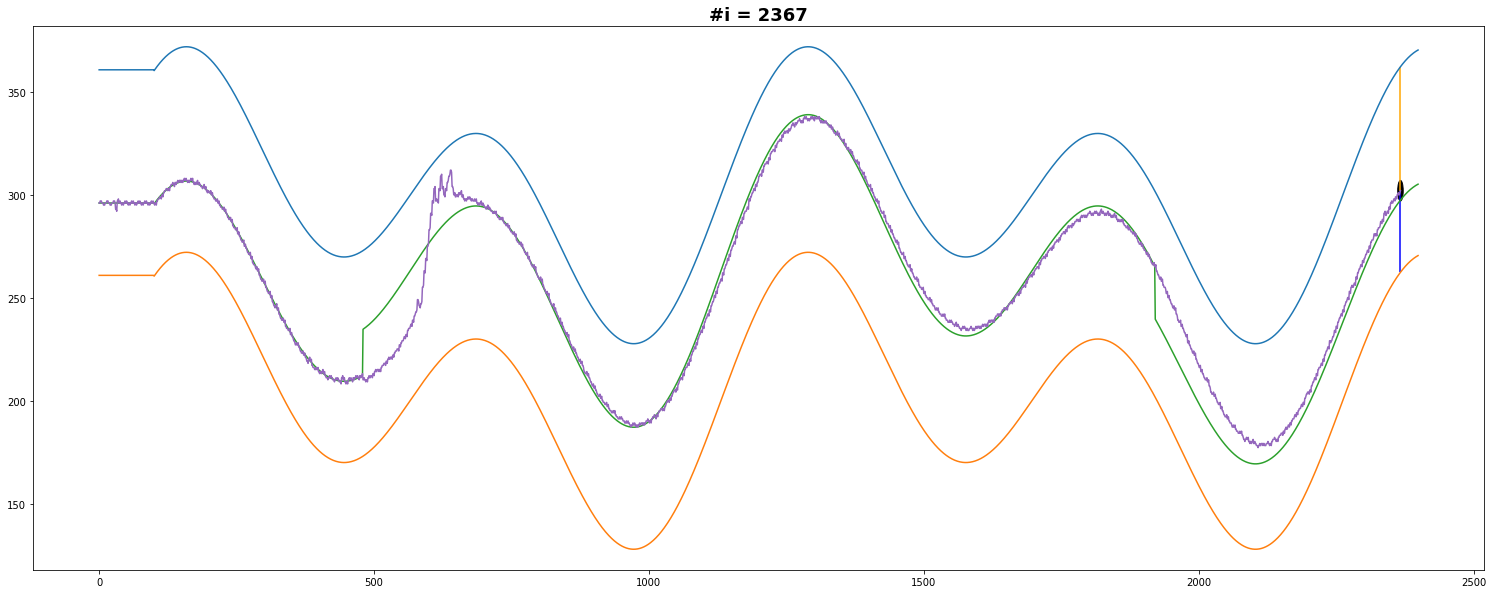

In [135]:
auto.plot_history(1)

self.distance_right_from_wall =  -39.691230910935985
self.distance_left_from_wall  =  -60.308769089064015


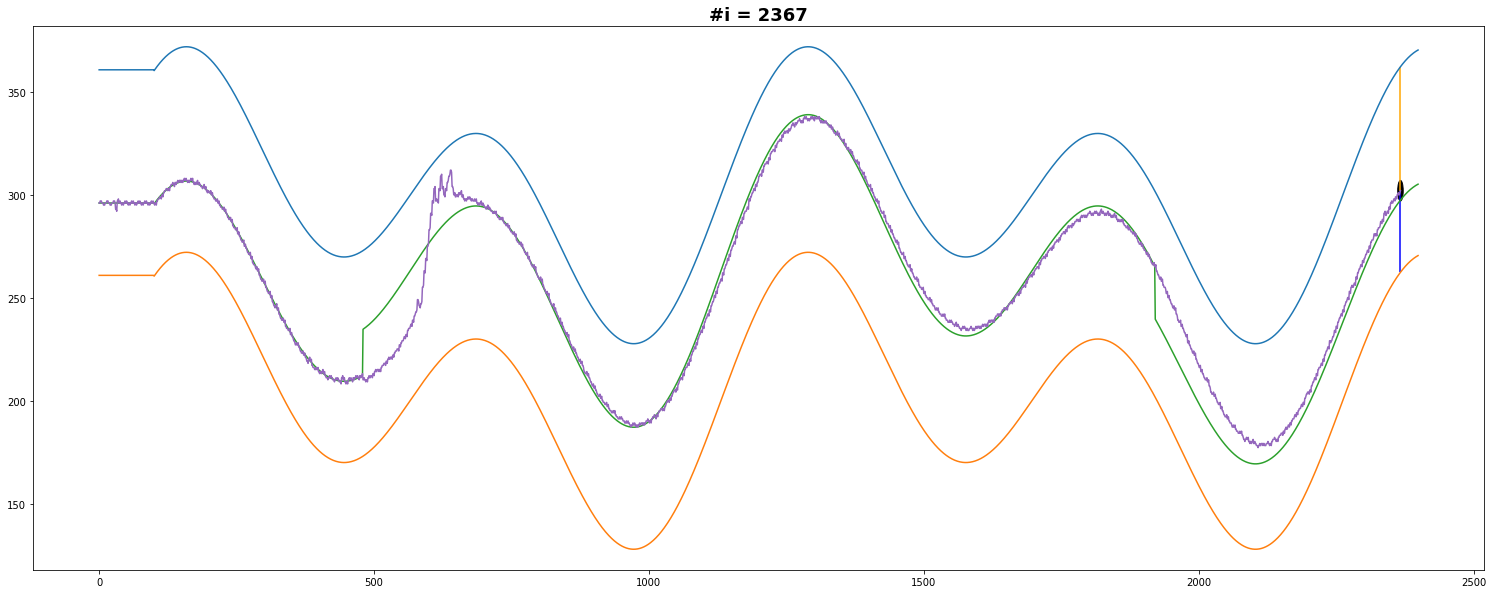

In [136]:
auto.plot_history(1)

self.distance_right_from_wall =  -39.691230910935985
self.distance_left_from_wall  =  -60.308769089064015


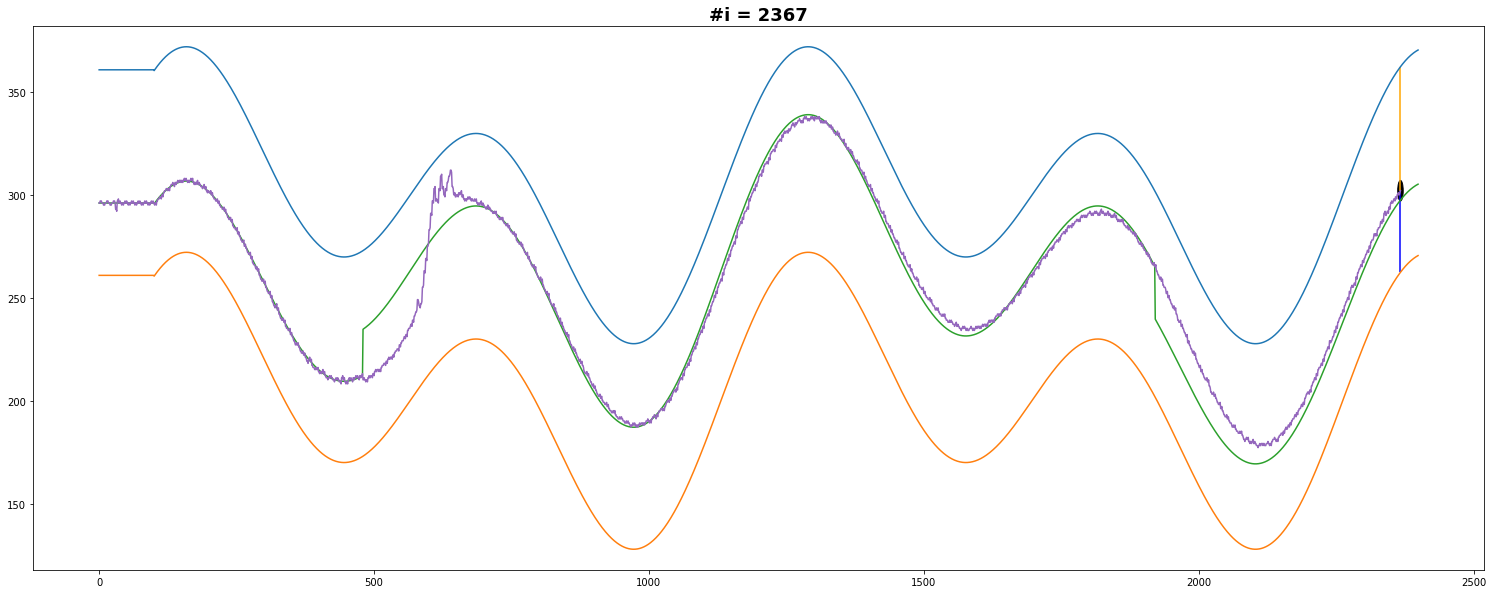

In [137]:
auto.plot_history(1)

self.distance_right_from_wall =  -39.691230910935985
self.distance_left_from_wall  =  -60.308769089064015


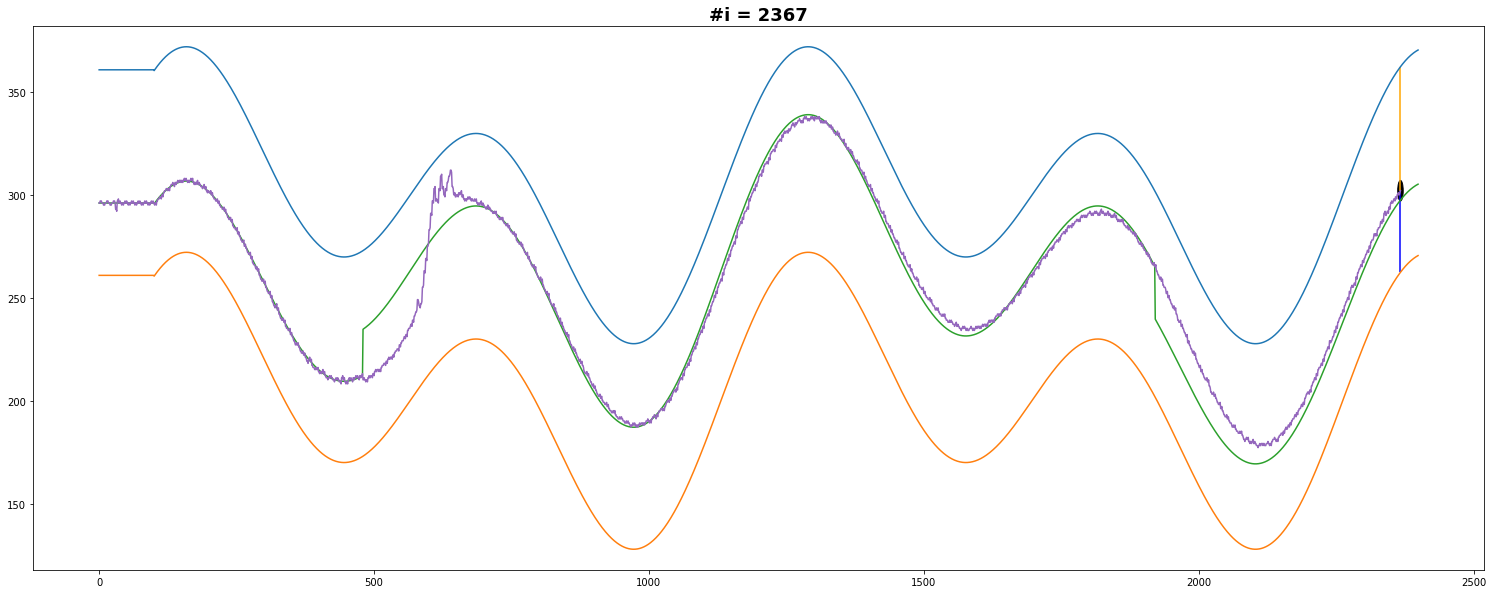

In [138]:
auto.plot_history(1)

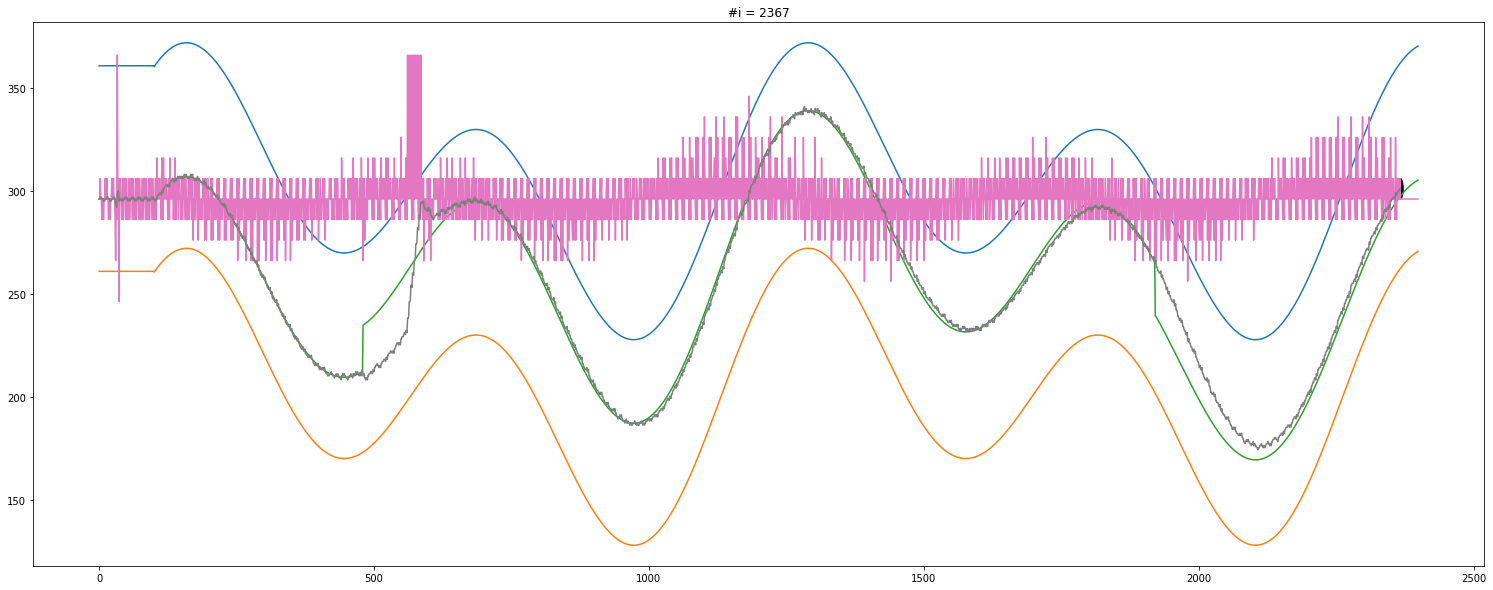

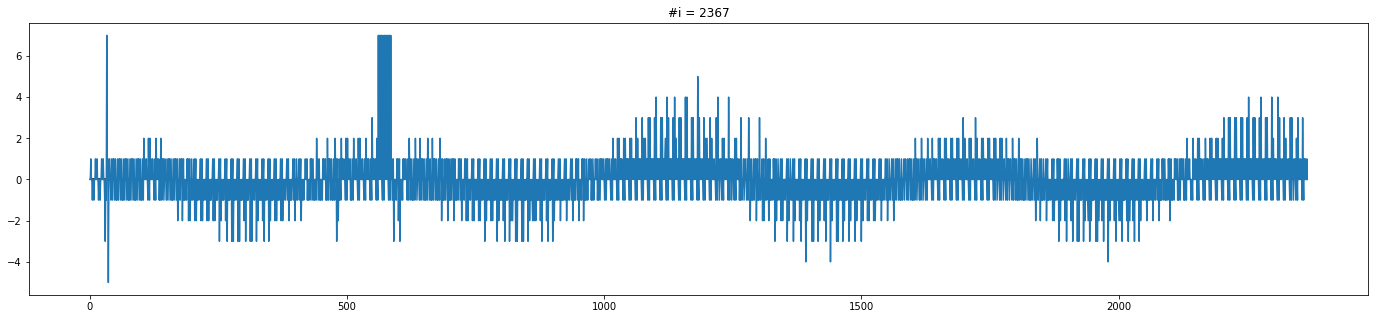

In [195]:
auto.plot_trace(freq = 1, flag = 1)

# Legacy stuff

In [24]:
# auto.save_plots()

# Test Run

In [102]:
# Random Walk :)
# road = Road(wide = 100, length = 1200, type = 69, v = 50, strech = 2)

# Concept drift :)
road = Road(wide = 100, length = 2400, type = 79, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2)
# cdr = concept drift rate point ( az út teljes hanyad részénél legyen a concept drift)

# Concept drift 2 darab és szimietrikus :)
road = Road(wide = 100, length = 2400, type = 78, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2)
# cdr = concept drift rate point ( az út teljes hanyad részénél legyen a concept drift)

plotter = Plotter()
storage = Storage()
printer = Printer(); printer._ut = False; printer._dc = False; printer._in = False

auto = Car(road, plotter, storage, printer)
auto.sensor_center_enable = False                 # <------------ kikapcsoltam a középső szenzort
auto.calculate_distances()

# Set hidden_layer_sizes
auto.mlp.hidden_layer_sizes = (10, 8)
auto.mlp.early_stopping = False
auto.mlp.validation_fraction = 0.0
auto.mlp.batch_size = 20                         # <-- 200 = 'auto'  --> az adaptivitásra lesz hatással
auto.mlp.shuffle = False
auto.mlp.max_iter = 1
auto.mlp.solver = 'sgd'

auto.run(2396, silent = True)

auto.plot_history(1)

cut_point  480
# ----------------------------------------- road Description -----------------------------------------
  		 road.length =  2400
  		 minimum slope (descending) =  -0.5913699733885949
  		 maximum slope (ascending)  =   22.525548489697485
# ----------------------------------------------------------------------------------------------------
480
1920
# ----------------------------------------- road Description -----------------------------------------
  		 road.length =  2400
  		 minimum slope (descending) =  -25.752297723857254
  		 maximum slope (ascending)  =   22.525548489697485
# ----------------------------------------------------------------------------------------------------
---------------------------- HELLO --------------------------
---------------------- ÚJ AUTO VAGYOK :) -----------------------
Iteration 1, loss = 0.42742467
Iteration 2, loss = 0.29669408
Iteration 3, loss = 0.22128802
Iteration 4, loss = 0.19688313
Iteration 5, loss = 0.13519723
Iteration 6,

limit_output extension: Maximum message size of 12000 exceeded with 21039 characters

## Fontos

Ez az ábra gyönyörűen mutatja, hogy ahogy emelkednek az esetszámok, ahogy gyarapodik a tanulóminta amin az adatokat tanítom, úgy egyre több adaton csinálja meg az iterációt ha a batch size kicsi.

Ezért idővel egyre több iterácitó csinál és ez tovább tart.

Például ha a batch_size = 20 és a már 2400 adat van az 2400/20 = 120 iterációt jelent, ezzel szemben amikor még csak 120 adat van azon 120/20 = 6 iterációval meg van.

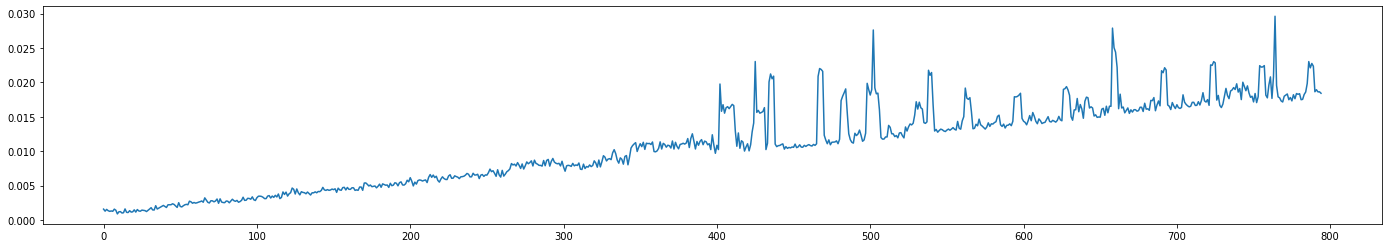

In [62]:
plt.figure(figsize=(24, 4))
plt.plot(auto.mlp_fit_evaluation_time_holder)
plt.show()

795


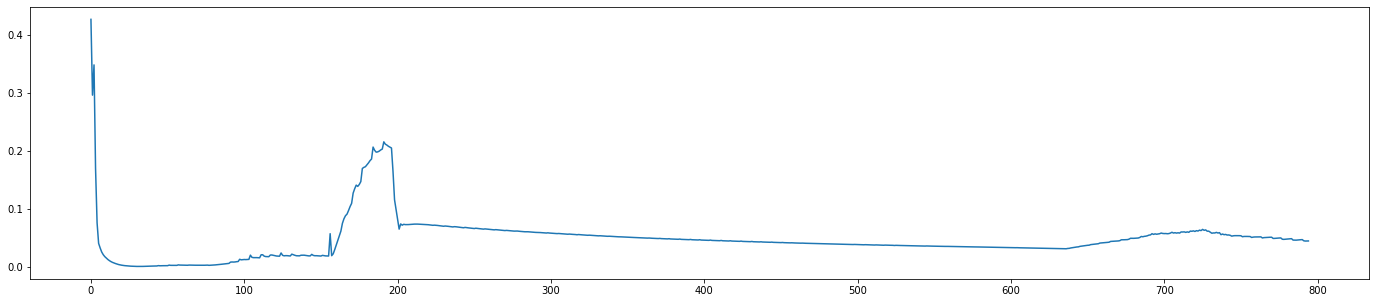

In [63]:
# Nagyon megtévesztő az MLP Loss, nem tudom pontosan mi alapján számolja ki a loss-t egy adott lépésre.
# Csak az aktuális batch-re, csak az aktuális iterációra? A teljes adaton iterál? Biztos nem az új adatok alapján.
# Szar az egész, igazából fogalmam sincs hogy milyen adatokat vesz ki ez a kurva scikit learn amikor egy iterációban
# tanul.
# Egyáltalán az egy iteráció nála azt jelenti, hogy végig kavirnyol az összes adaton amit odaadok neki és batchenként végig
# megy rajta?
# Valószínűleg így működik.
# Ha így van akkor az azt jelenti, hogy egyre hosszabb az adatsorom, egyre tovább tart egy iteráció.
# De kurvára nem ilyen online formában tanítjuk, hanem ha jól értem akkor végig megy az egész adaton amit odaadok neki,
# és minden batch esetén módosít azokon a kurva súlyokon.

plt.figure(figsize=(24,5))
plt.plot(auto.mlp.loss_curve_)
print(len(auto.mlp.loss_curve_))

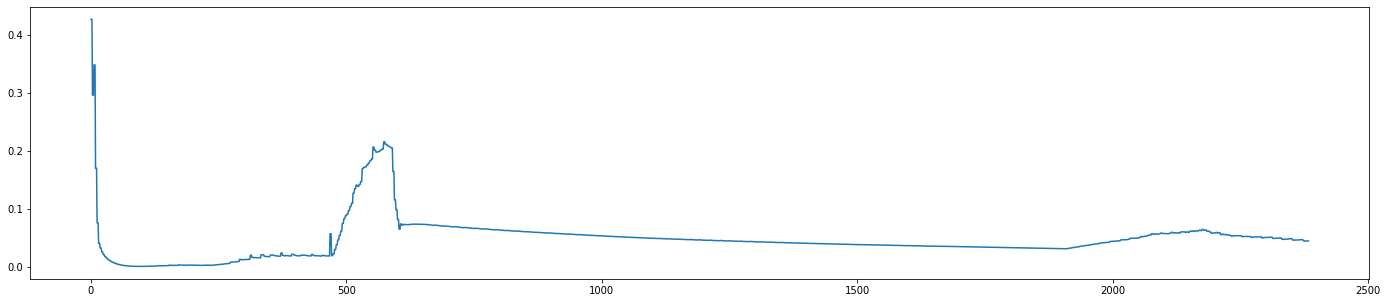

In [64]:
# A különbség a felső és az alsó között ott van, hogy az mlp.loss_curve_ minden iteráció után letárolja a loss-t

# Amit viszont alul csinálok, az az, hogy ha megvolt a neurális hálónak adott ciklusban az összes iteráció (ez lehet 1,
# 2, 10, 100, akárhány) akkor letárolom a loss-t szintén az mlp.loss_ értékből.

# Egyébként mindkettő egy kicsit veszélyes praxis mert egyikről sem tudom, hogy pontosan milyen loss_t tárol le?
# Az iteráció végén? Vagy az utolsó batch_re? egy adott batchre_?

# Át kéne írni az egész programot úgy, hogy tényleg online módon tanítsa ami azt jelenti, hogy a fit helyett a
# partial_fit függvényt kéne használnom, és gondoskodnom kéne róla, hogy csak az új adatot kapja meg.
# Habár egyébként semmi gondom azzal, hogy nem így tanítjuk és látja a régi adatokat is és azokon végig iterálva újra
# tanul.
# Csak fontos érteni a különbséget.

plt.figure(figsize=(24,5))
plt.plot(auto.loss_holder)
plt.show()

# Test Runs

Iteration 94, loss = 0.01571887
Iteration 95, loss = 0.01526447
 --------------- plot trace --------------- 
Iteration 96, loss = 0.01481514
self.distance_right_from_wall =  -37.31151314404147
self.distance_left_from_wall  =  -62.68848685595856


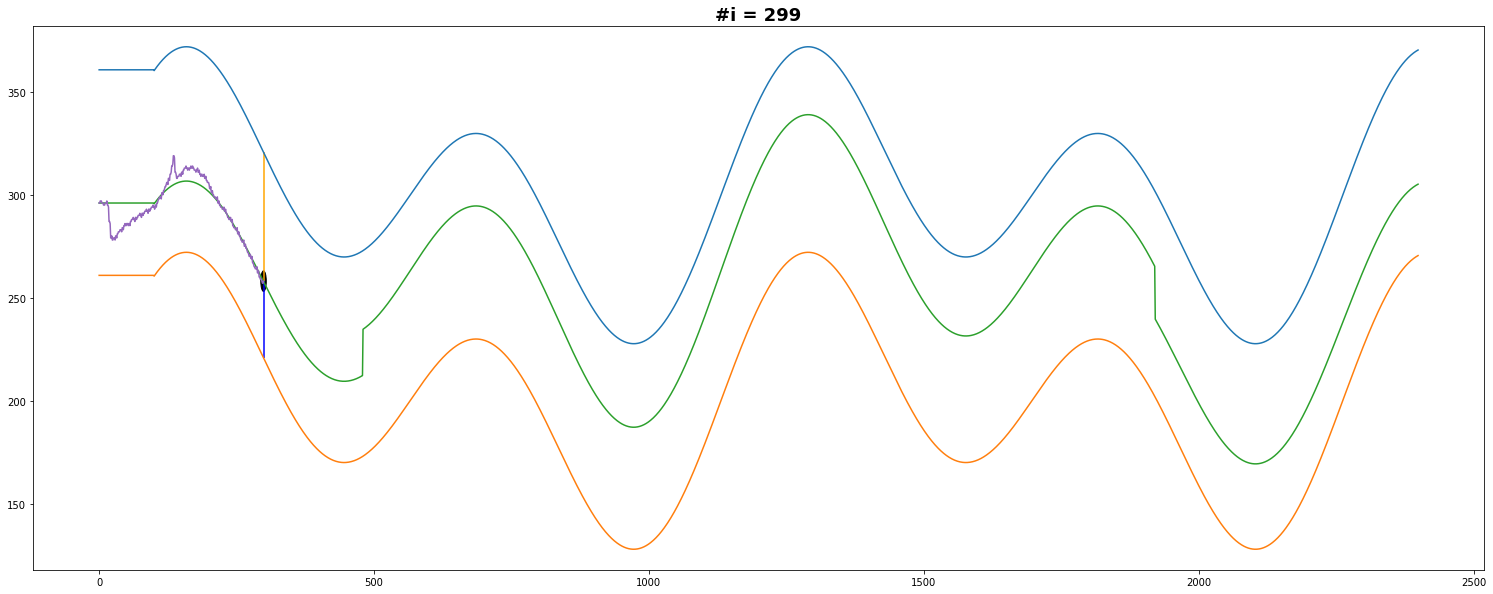

In [65]:
exp_holder = []

# first_neuron = [10,5]
# second_neuron = [1,2,5]

first_neuron = [10,5]
second_neuron = [1,2,5]

from copy import deepcopy

# Concept drift :)
road = Road(wide = 100, length = 2400, type = 79, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2)
# cdr = concept drift rate point ( az út teljes hanyad részénél legyen a concept drift)

# Concept drift 2 darab és szimietrikus :)
road = Road(wide = 100, length = 2400, type = 78, v = 50, shift = 0, strech = 0, noise=0, b=0, cdr = 0.2)
# cdr = concept drift rate point ( az út teljes hanyad részénél legyen a concept drift)

for first in first_neuron:
    for second in second_neuron:
                
        plotter = Plotter()
        storage = Storage()
        printer = Printer(); printer._ut = False; printer._dc = False; printer._in = False

        auto = Car(road, plotter, storage, printer)       # <------------ megcsinálom az új autot
        auto.sensor_center_enable = False                 # <------------ kikapcsoltam a középső szenzort
        auto.calculate_distances()

        # Set hidden_layer_sizes
        auto.mlp.hidden_layer_sizes = (first, second)     # <-- (10, 5)
        auto.mlp.early_stopping = False
        auto.mlp.validation_fraction = 0.0
        auto.mlp.solver = 'sgd'

        auto.run(300, silent = True)

        auto.plot_history(1)
        
        exp_holder.append(deepcopy(auto))

        # Az auto tárolja az adatokat -> öket tegyük futás után egy listába

        # A PostPlotter-ben megnézem, hogy írtam meg a PlotHistory függvényt -> most egy ábrán akarom látni az összeset

        # Mivel az auto tárolja a modeljét is ezért elég az autot eltárolni, majd onnan olvasom ki a modell információit

MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 1),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=98765000,
             random_state=1, shuffle=False, solver='sgd',
             validation_fraction=0.0, verbose=True, warm_start=True)
self.distance_right_from_wall =  -37.31151314404147
self.distance_left_from_wall  =  -62.68848685595856


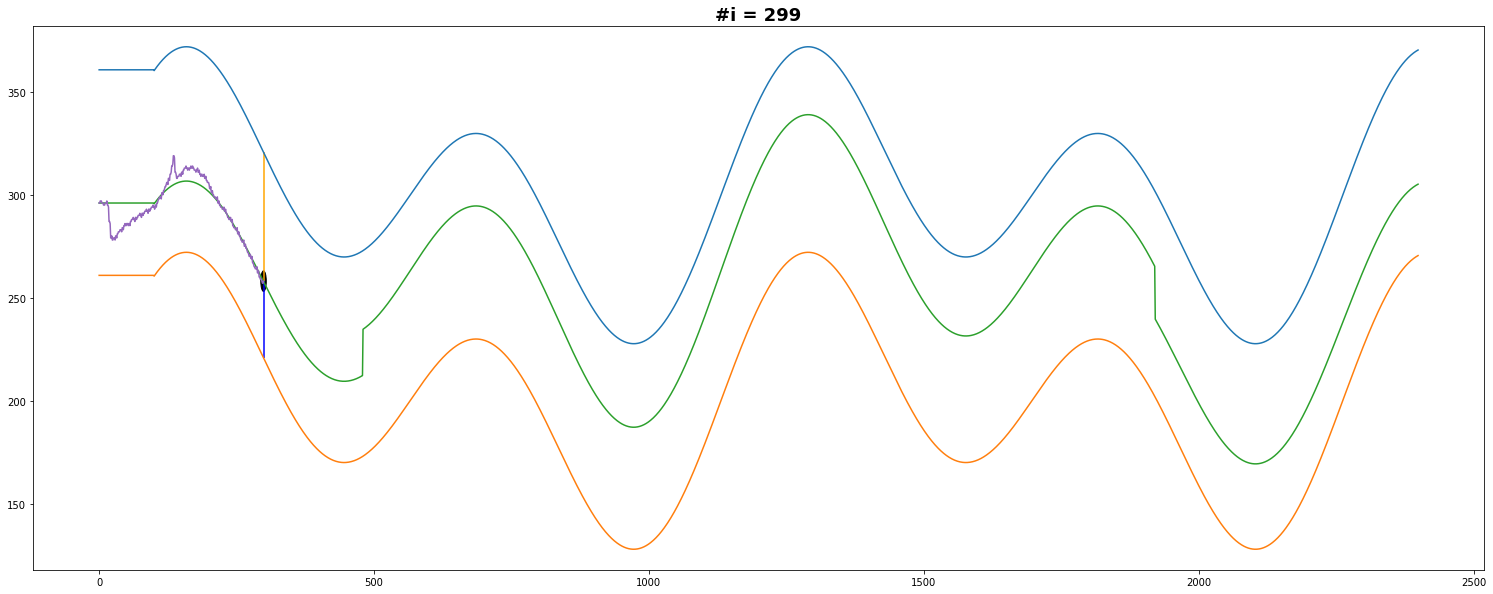

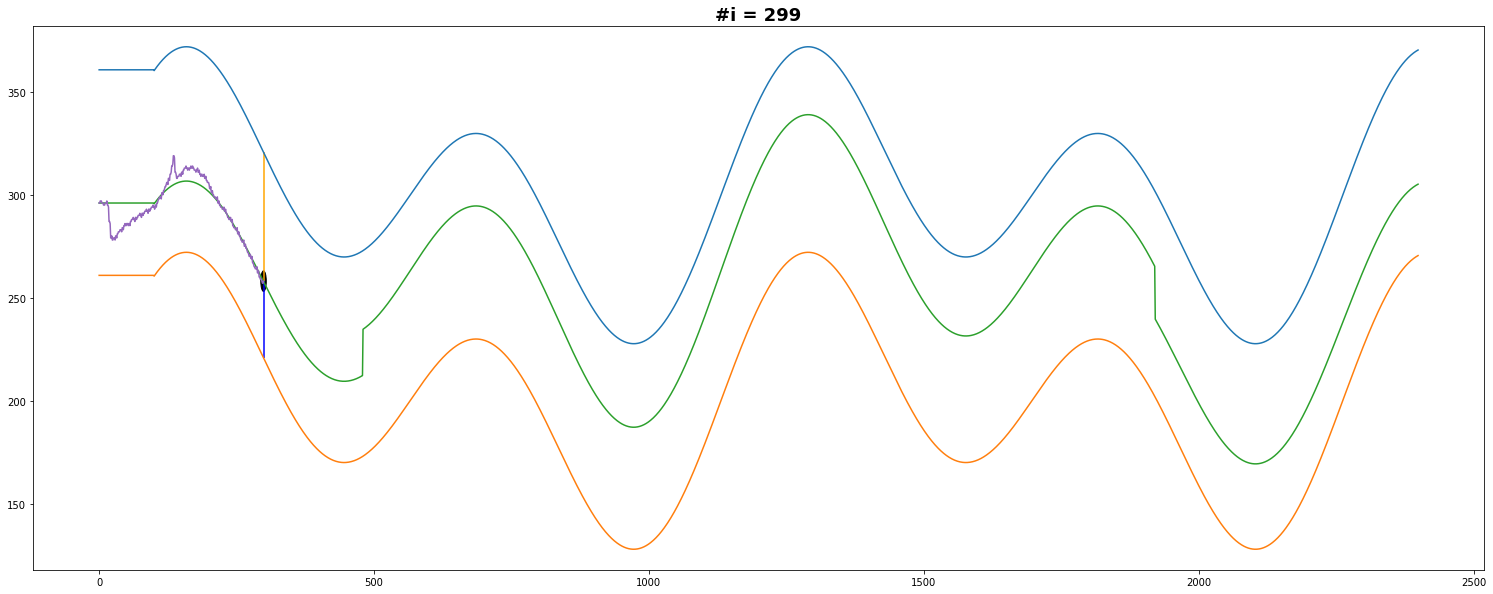

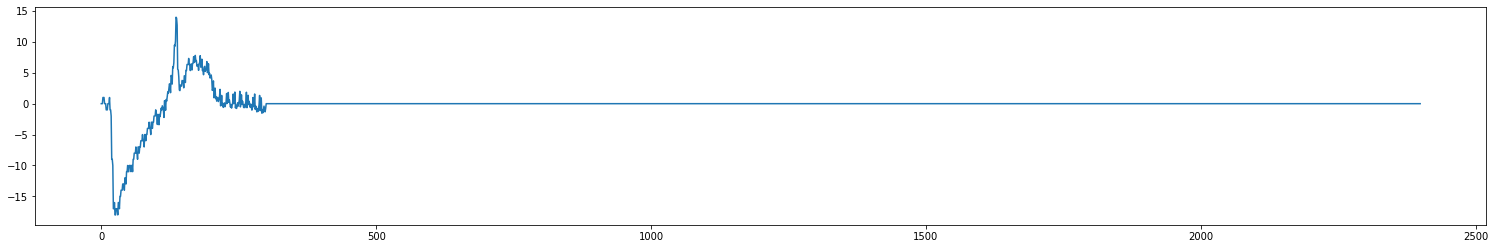

In [66]:

print(exp_holder[0].mlp)                              # <-- az első kísérlet mlp objektuma

# Ami még hasznos lehet
# auto.plotter.plot_mlp(mlp=auto.mlp, flag = 3)
# auto.plotter.test_plot2(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[6])
# auto.plotter.test_plot(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[99])

# Ez különösen fontos mert jól mutatja, hogy mennyire determinisztikus a kapcsolat a két szenzorra
# auto.plot_state_space_discover(1)

# Néhány meg van a PostPlotter osztályban is
postPlotter = PostPlotter(auto)                       # <--
postPlotter.plot_history(flag = 1)                    # <-- ez alapján dolgozunk
postPlotter.plot_history_self()                       # <-- ez alapján dolgozunk
postPlotter.plot_y_distance_fix()                     # <-- ez alapján dolgozunk
# postPlotter.plot_y_distance()
# postPlotter.plot_mlp()
# postPlotter.plot_mlp_surface_prediction_v4(resolution=100, transparency=0.8, cmap='Blues', center=0.0)
# postPlotter.plot_sensors_distibution(bins=20)


# ki találtam, hogy tegyem rá egy ábrára az össze kísérlet eredményét

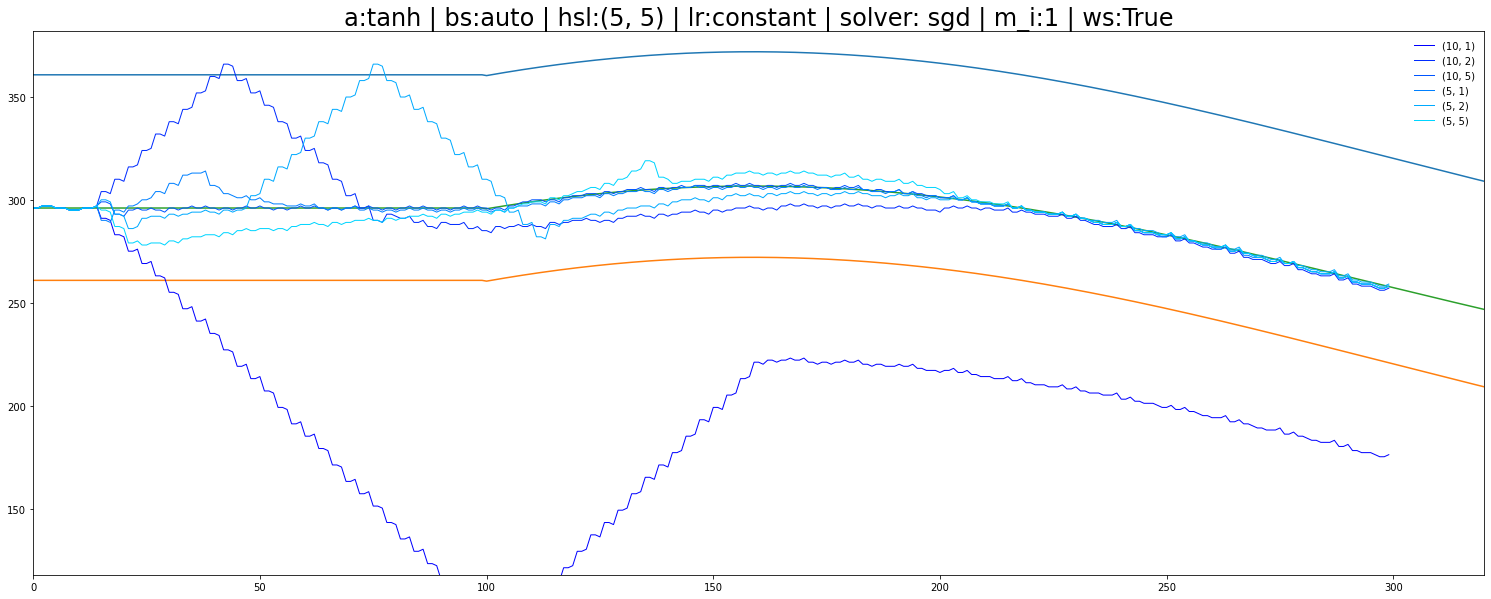

In [67]:
fig, ax = auto.road.show()
# ax.set_ylim((700, 1000))                                        # <-- adjust the y_lim
ax.set_xlim((0, 320))                                          # <-- adjust the x_lim

n = len(exp_holder)

start = 0
end   = 300

for i, car in enumerate(exp_holder):
    
    model_params = car.mlp.get_params()
    activation = model_params.get('activation')
    batch_size = model_params.get('batch_size')
    hls        = model_params.get('hidden_layer_sizes')
    lr         = model_params.get('learning_rate')
    solver     = model_params.get('solver')
    max_iter   = model_params.get('max_iter')
    warm       = model_params.get('warm_start')
    title = 'a:' + activation + ' | bs:' + str(batch_size) + ' | hsl:' + str(hls) +\
    ' | lr:' + str(lr) + ' | solver: ' + solver + ' | m_i:' + str(max_iter) + ' | ws:' + str(warm)
    ax.set_title(title, fontsize=24, fontweight='normal')
    
    ax.plot(car.y_history[start:end], c = (0, i/n, 1, 1), lw = 1, label = str(hls))

plt.legend(frameon=False)
plt.show()


In [68]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Néhány adat, hogy szabályozzuk a kívánt adatok hosszát
n = len(exp_holder)
start = 0
end   = 300

# Hozzá kéne adni még az utat
x_time = np.arange(0, len(car.y_history[start:end]))

road_line = dict(color='#000000', width=1)
fig.add_trace(go.Scatter(x=x_time, y=car.road.wall_left, mode='lines', name='', line=road_line, showlegend = False))
fig.add_trace(go.Scatter(x=x_time, y=car.road.wall_center, mode='lines', name='', line=road_line, showlegend = False))
fig.add_trace(go.Scatter(x=x_time, y=car.road.wall_right, mode='lines', name='', line=road_line, showlegend = False))

for i, car in enumerate(exp_holder):
    
    model_params = car.mlp.get_params()
    activation = model_params.get('activation')
    batch_size = model_params.get('batch_size')
    hls        = model_params.get('hidden_layer_sizes')
    lr         = model_params.get('learning_rate')
    solver     = model_params.get('solver')
    max_iter   = model_params.get('max_iter')
    warm       = model_params.get('warm_start')
    title = 'a:' + activation + ' | bs:' + str(batch_size) +\
    ' | lr:' + str(lr) + ' | solver: ' + solver + ' | m_i:' + str(max_iter) + ' | ws:' + str(warm)
    
    N_exp = len(exp_holder) - 1
    b_color = 255//(i+1)
    g_color = 255//N_exp * i
    # b_color = 255//N_exp * i
    
    x_time = np.arange(0, len(car.y_history[start:end]))
    fig.add_trace(go.Scatter(x=x_time, y=car.y_history[start:end],
                    mode='lines',
                    line=dict(
                        color='rgb(0,'+ str(g_color) + ', ' + str(b_color) + ')',
                        width=1
                    ),
                    name=str(hls)))

fig.update_layout(
    title={
        'text': "Runs with different number of neurons on different layers <br> " + title,
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Time steps",
    yaxis_title="",
    legend_title="Neurons",
    font=dict(
        family="Times New Roman, monospace",
        size=14,
        color="Black"
    )
)

fig.show()


# Dev

<a name="dev"></a> [set](#set) [exp](#exp) [run](#run) dev [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)


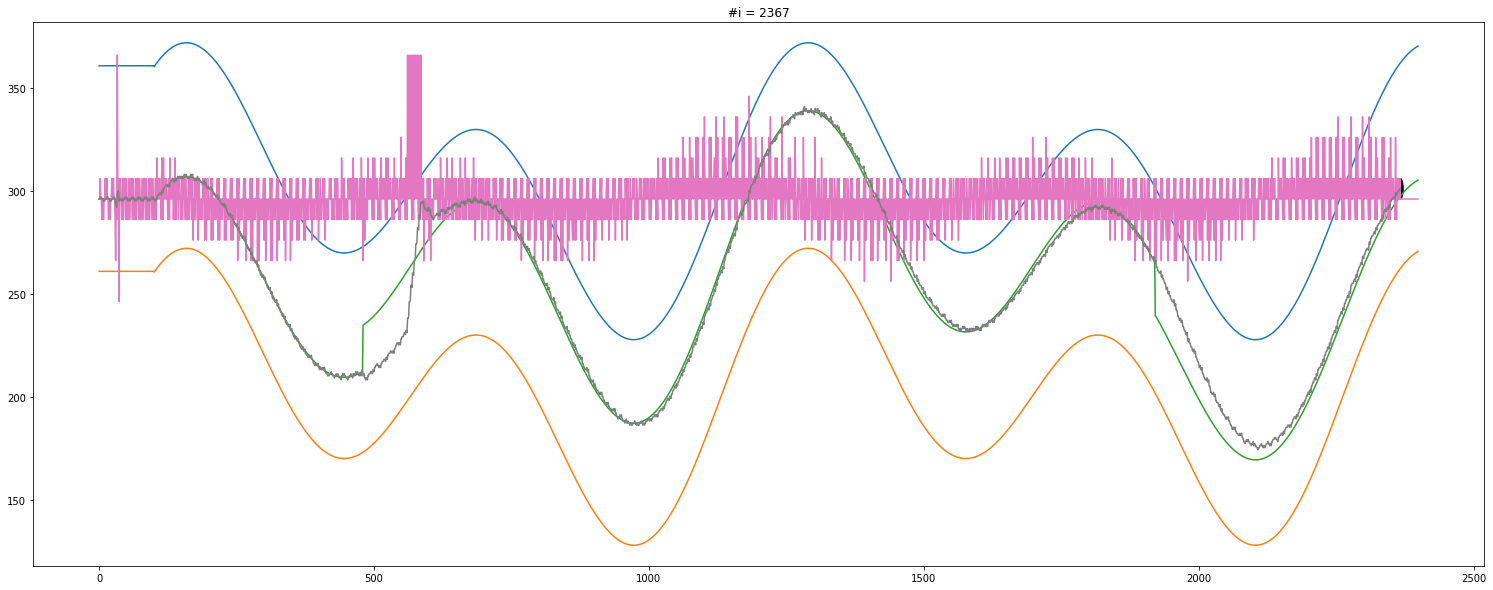

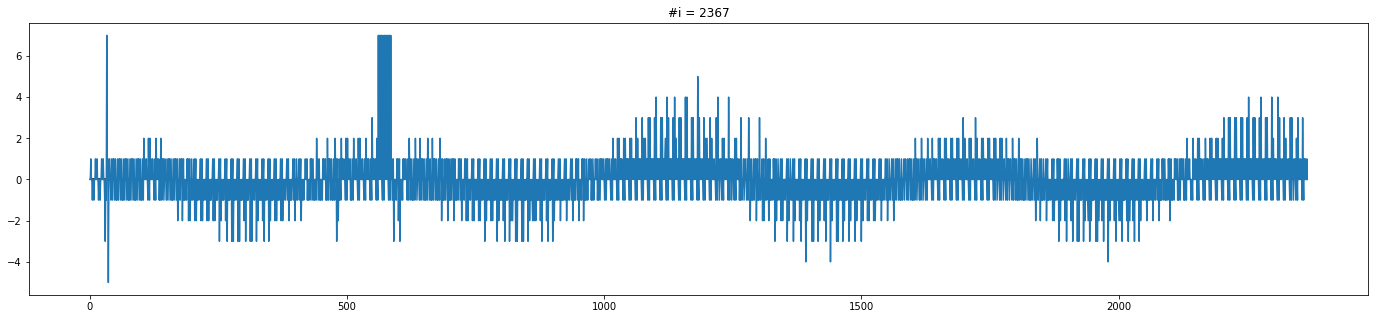

In [196]:
auto.plot_trace(1, 1)

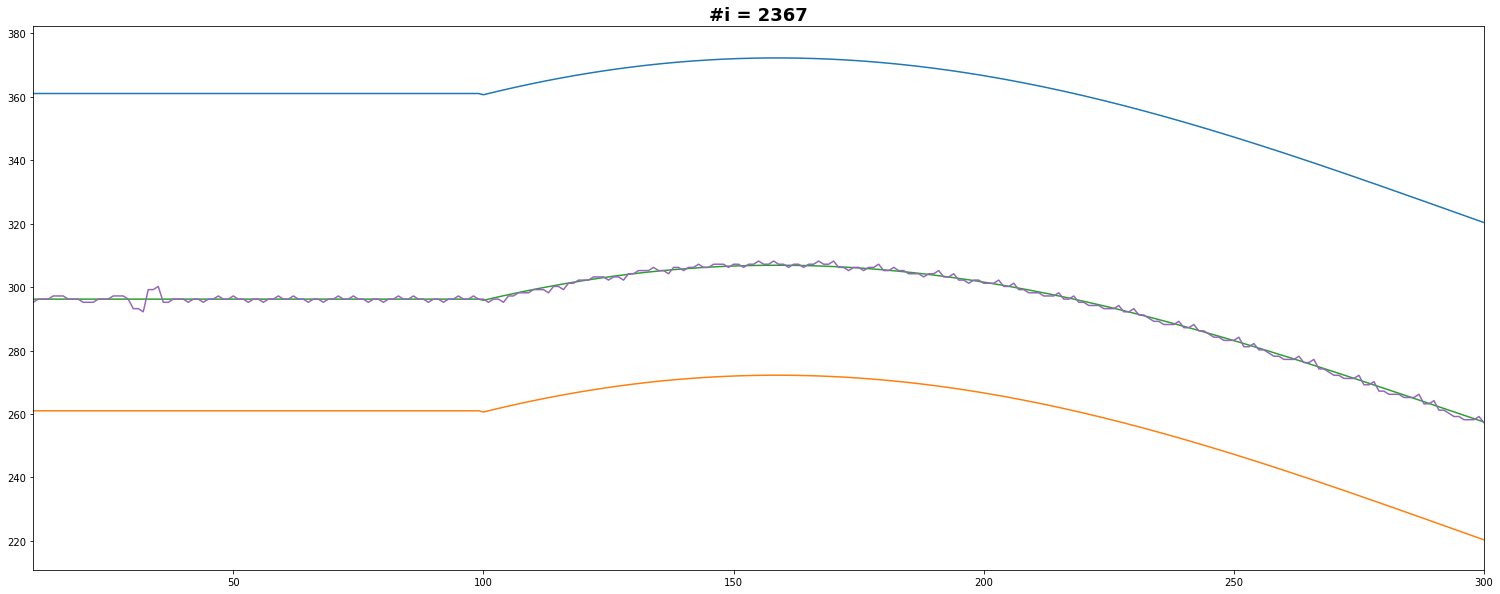

In [197]:
auto.plot_history_range(1, 10, 300, autoscale=True)

In [198]:
print('len = ', len(auto.mlp.coefs_))

print('type(auto.mlp.coef_[0]) = ', type(auto.mlp.coefs_[0]))
print('type(auto.mlp.coef_[1]) = ', type(auto.mlp.coefs_[1]))

print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[0].shape)
print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[1].shape)
print('auto.mlp.coef[].shape = ',auto.mlp.coefs_[2].shape)

len =  3
type(auto.mlp.coef_[0]) =  <class 'numpy.ndarray'>
type(auto.mlp.coef_[1]) =  <class 'numpy.ndarray'>
auto.mlp.coef[].shape =  (3, 10)
auto.mlp.coef[].shape =  (10, 8)
auto.mlp.coef[].shape =  (8, 1)


2338


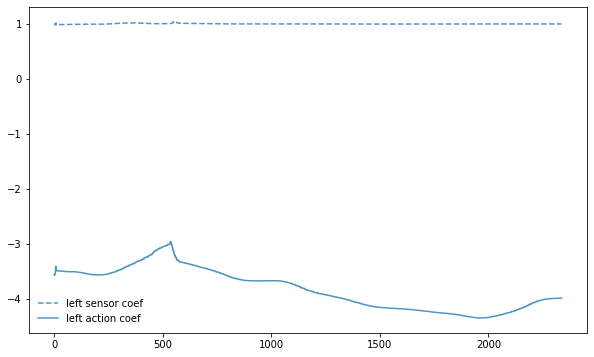

2338


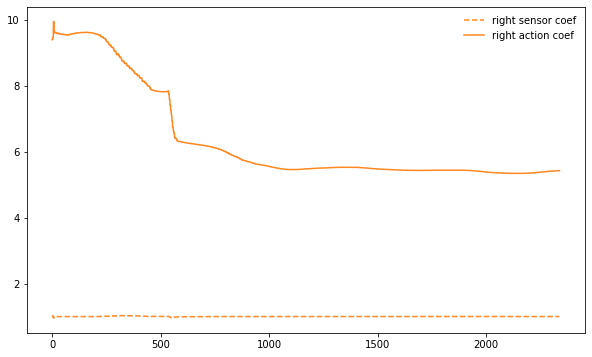

2338


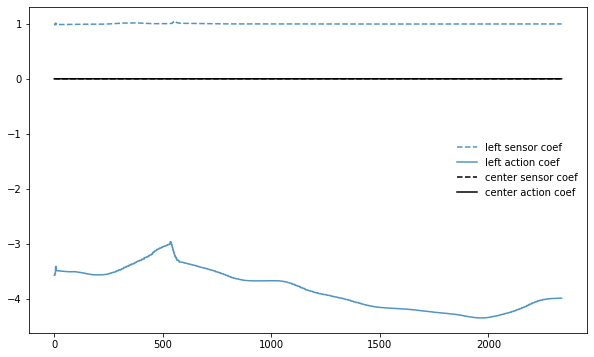

2338


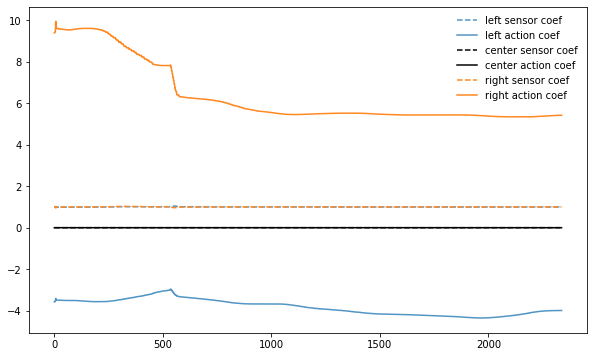

2338


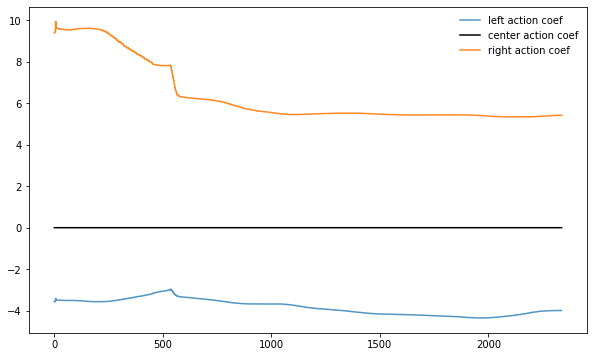

2338


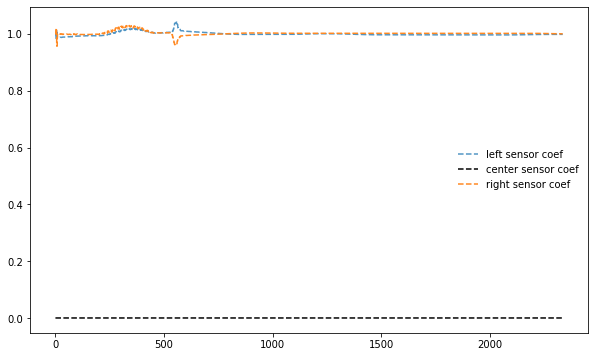

In [199]:

# ugyen ezt meg kell csinálni az mlp modellre is (ott kicsit több súly van)

# aztán áttenni mindkettőt a plotter osztályba


postPlotter = PostPlotter(auto)

postPlotter.plot_lr_weight(car = auto, flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['right'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], coefs=['sensor'], flag = 1)

postPlotter.plot_lr_weight(car = auto, sensors=['left', 'center', 'right'], coefs=['action'], flag = 1)


In [200]:
# Create rotated animation from still image - sensor_left, sensor_right vs y_distance

# Temporary disabled - flag = 0

from dev import *

for i in range(100):
    Plot3DVersion5(elevation = 10, azimuth = i, flag = 0, i=i)

[ 3 10  8  1]


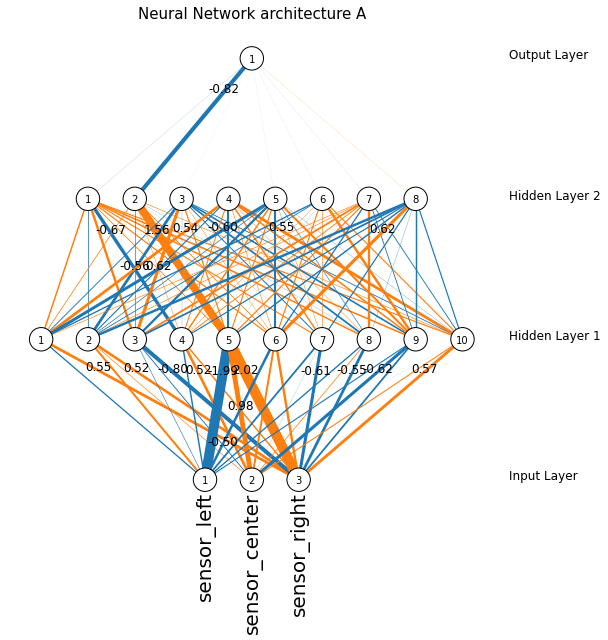

In [201]:
auto.plotter.plot_mlp(mlp=auto.mlp, flag = 3)

In [146]:
# Hogy a faszba tanította rá magát a centerre amikor annak az értéke végig 0

# auto.sensor_center
# auto.sensor_center
# auto.sensor_left

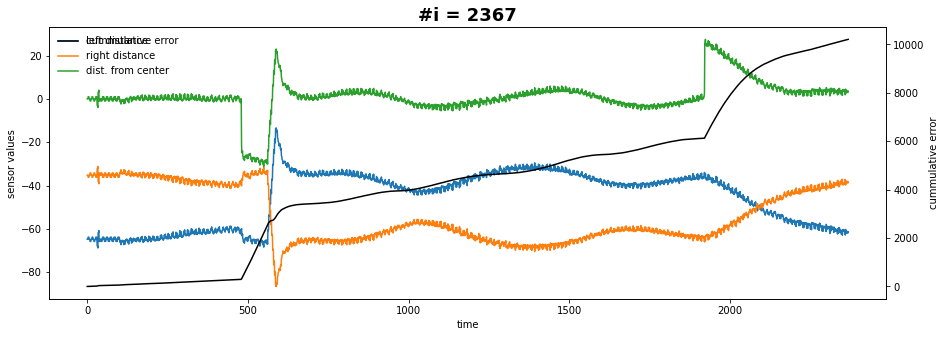

In [202]:
auto.plotter.test_plot2(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[6])

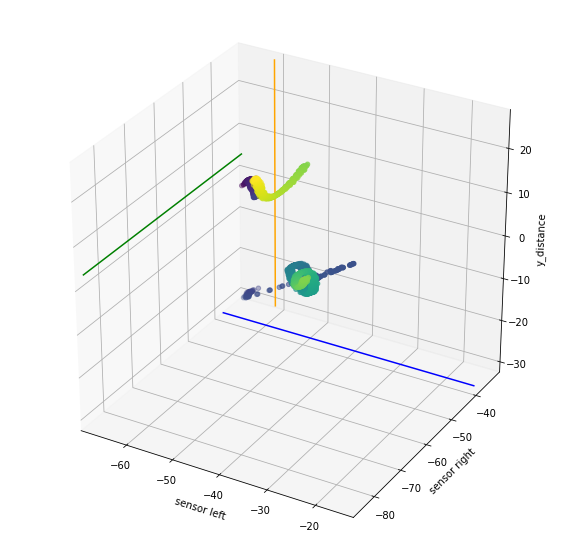

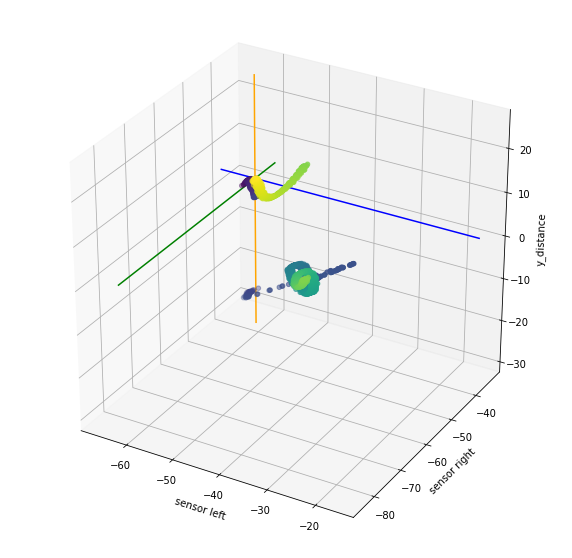

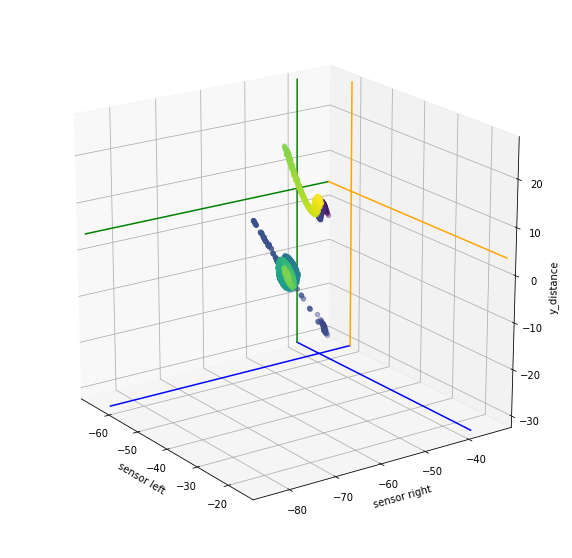

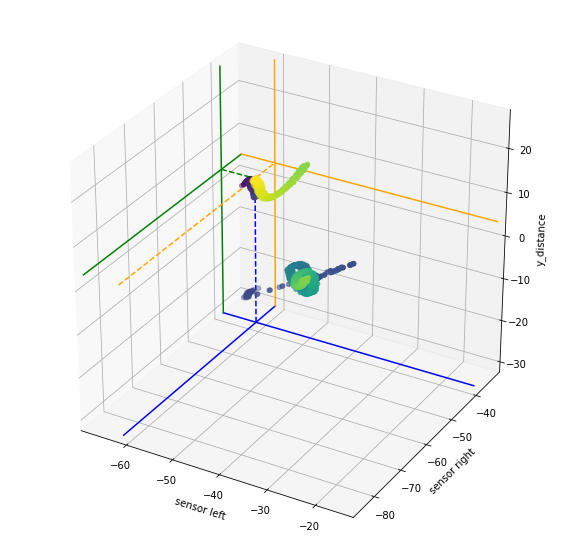

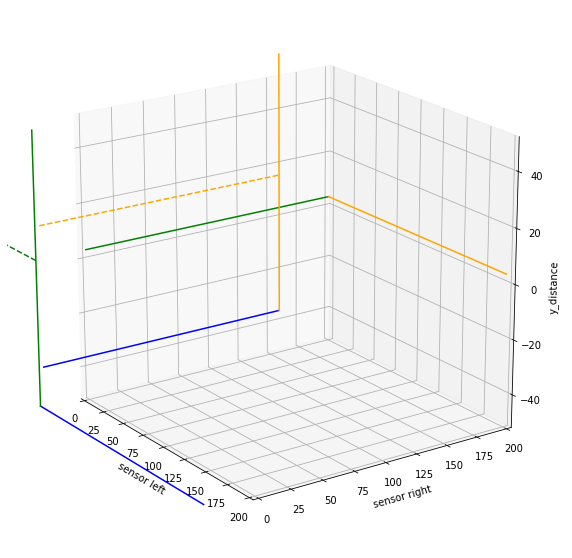

In [203]:
auto.plotter.test_plot(auto.sensor_left, auto.sensor_right, auto.y_distance, auto.x, flag=1, lists=[99])

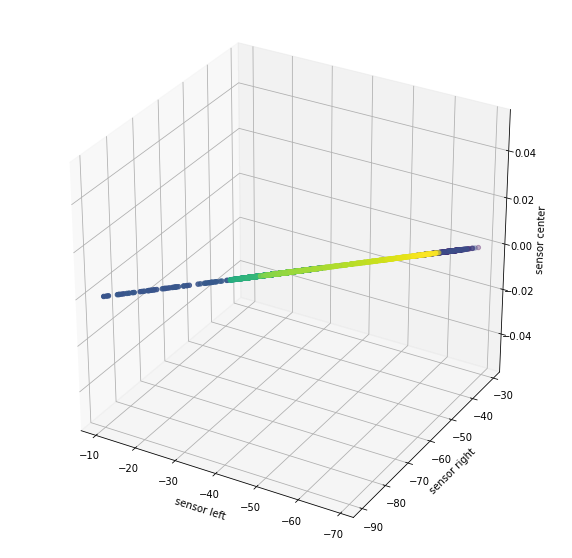

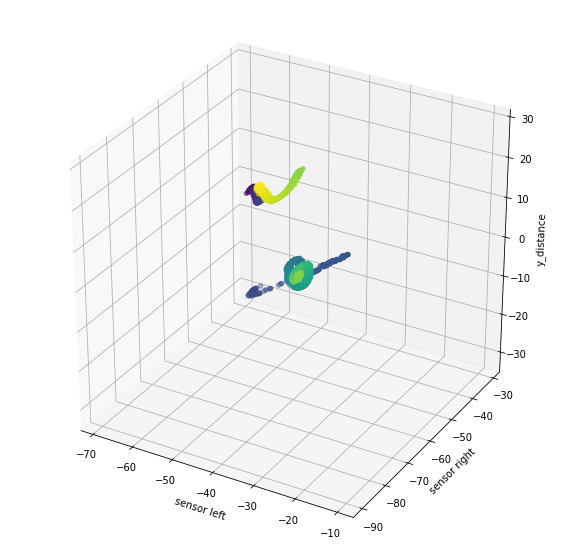

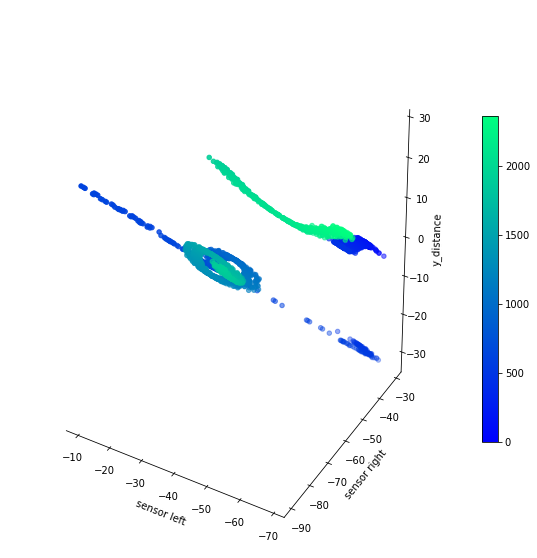

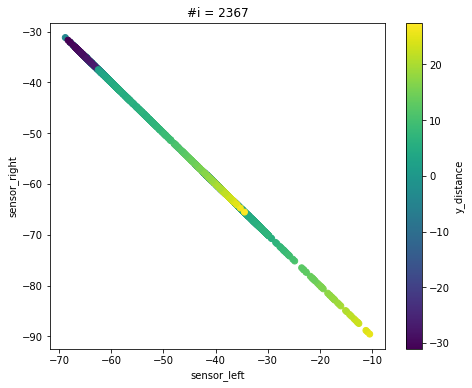

In [149]:
auto.plot_state_space_discover(1)

# PostPlotter

<a name="pst"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) pst [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)


self.distance_right_from_wall =  -38.691230910935985
self.distance_left_from_wall  =  -61.308769089064015


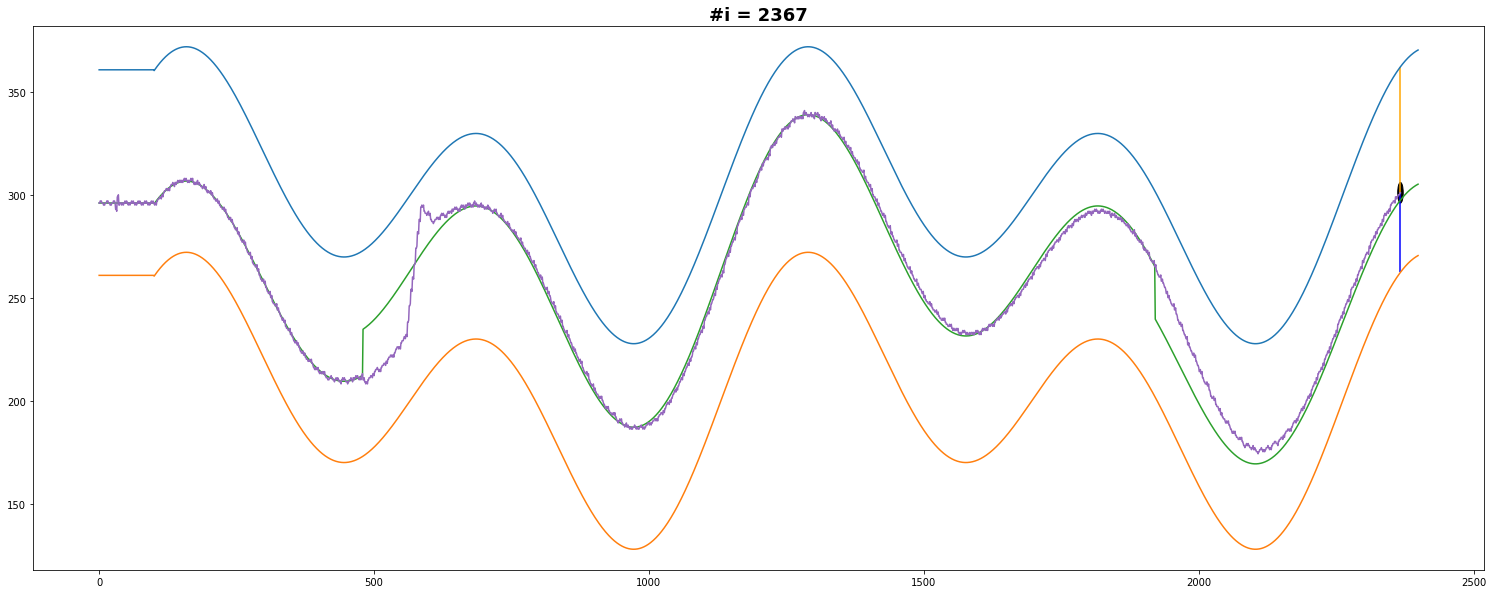

In [204]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
auto.plot_history(1)

self.distance_right_from_wall =  -38.691230910935985
self.distance_left_from_wall  =  -61.308769089064015


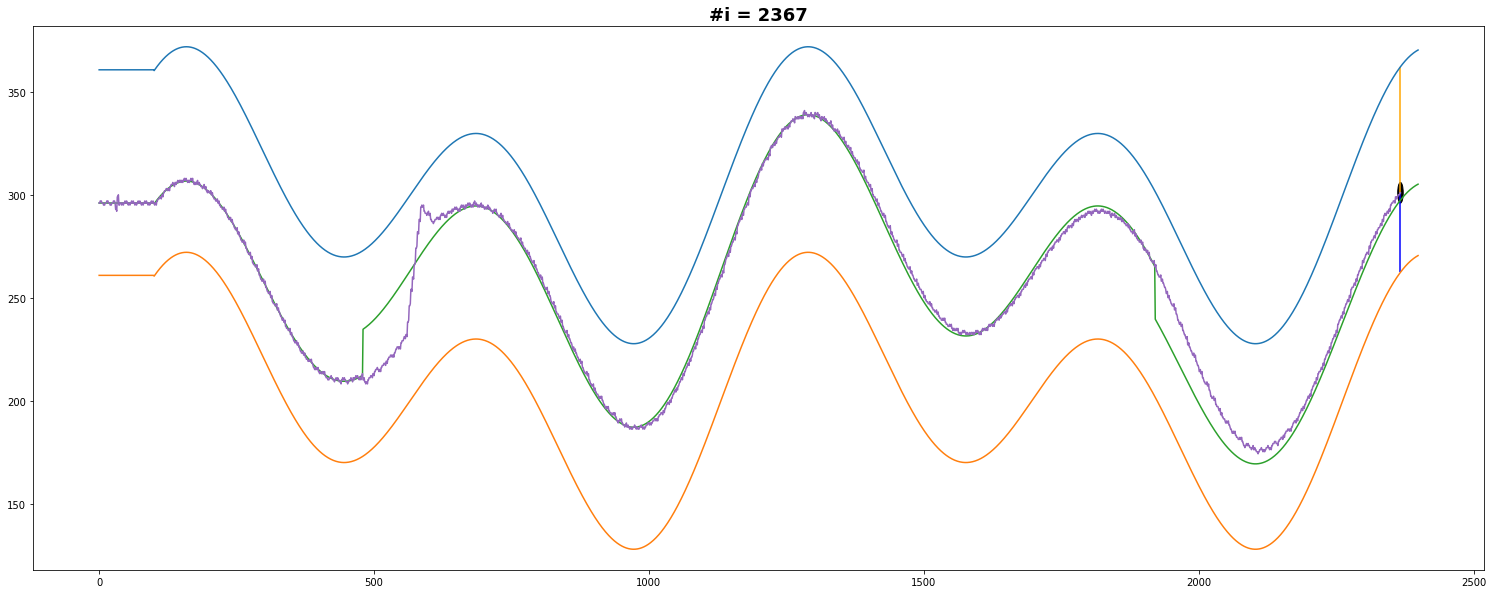

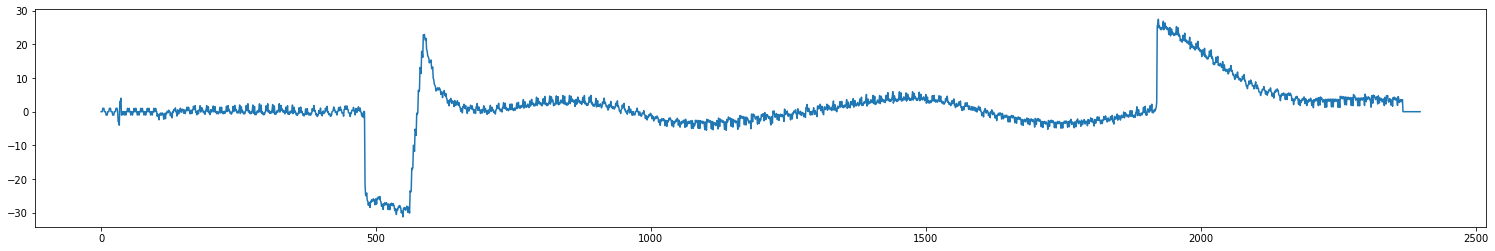

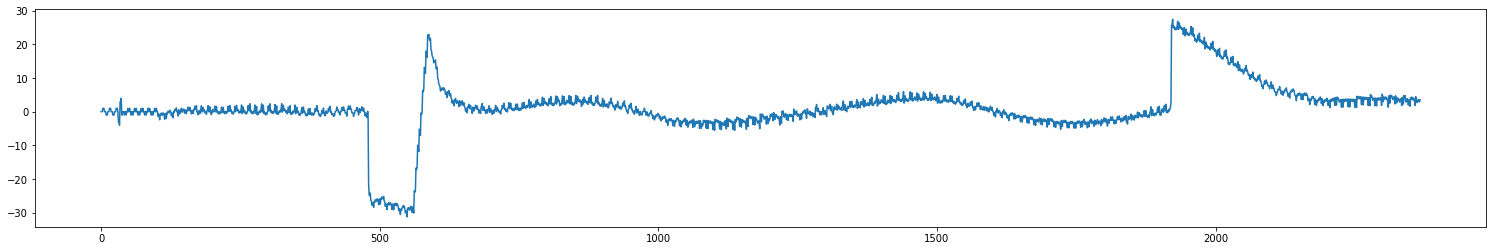

[ 3 10  8  1]


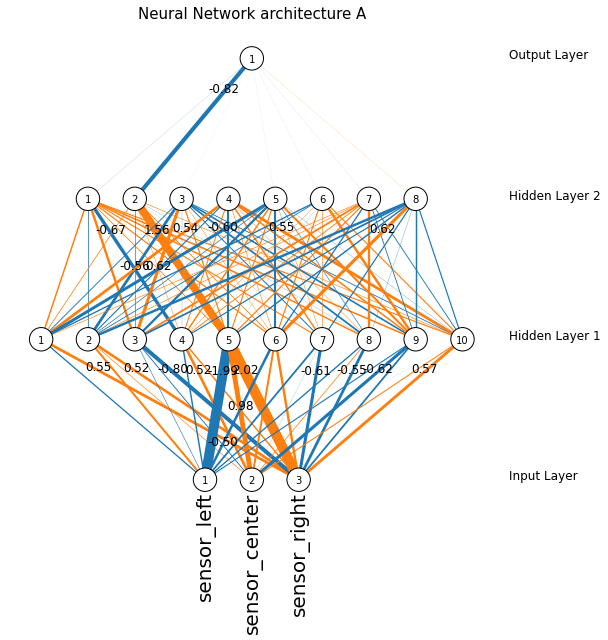

In [205]:
postPlotter = PostPlotter(auto)

postPlotter.plot_history(flag = 1)

postPlotter.plot_y_distance_fix()

postPlotter.plot_y_distance()

postPlotter.plot_mlp()


In [206]:
# csinálni egy animációt simán arra, hogy fix center érték mellett megtekeri a plotot

# csinálni arra is egy animációt, hogy fix nézőpont mellett végig iterál center 50-től 200-ig

# Create rotated animation from still image - sensor_left, sensor_right vs y_distance, predcition

# Temporary disabled - flag = 0

for i in range(100):
    postPlotter.plot_mlp_surface_prediction_v4(limit = True, flag = 0, resolution=100, transparency=0.8, cmap='Blues',
                                               center=100, elevation=10, azimuth = i, i = i)

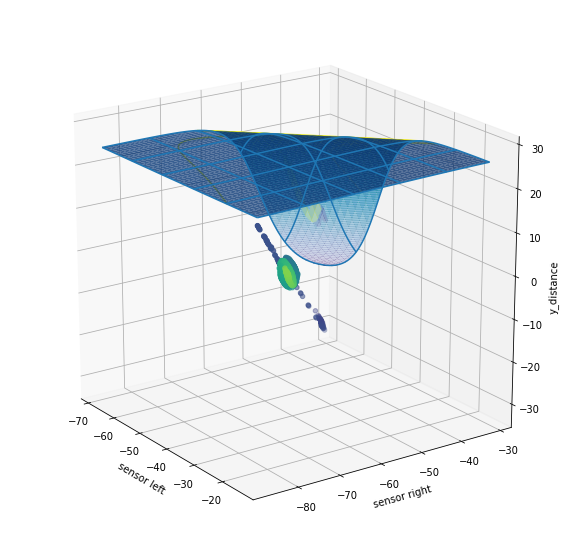

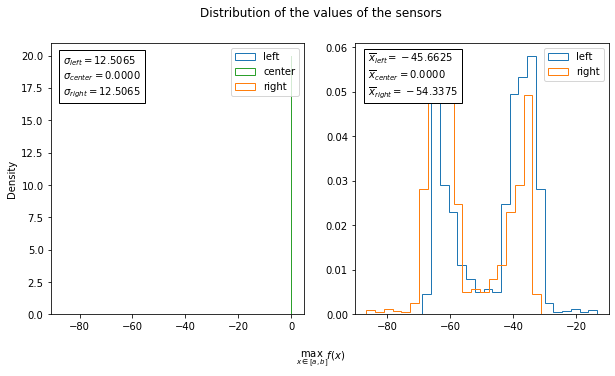

In [207]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

postPlotter = PostPlotter(auto)

postPlotter.plot_mlp_surface_prediction_v4(resolution=100, transparency=0.8, cmap='Blues', center=0.0)

postPlotter.plot_sensors_distibution(bins=20)

## TestCar

<a name="str"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) str [zip](#zip) [mp4](#mp4) [tst](#tst)


In [85]:
# Save

# Via storage object -> passing a car object
storage.save_mlp_from_object(auto)
storage.save_regression_from_object(auto)
storage.save_minmaxscaler_from_object(auto)

# Via auto.storage object -> passing a car object and its property fields
#  -> this can be used inside the car.run() methos as well
auto.storage.save_mlp(auto.mlp)
auto.storage.save_minmaxscaler(auto.x_minmaxscaler, auto.y_minmaxscaler)
auto.storage.save_regression(auto.regression_left, auto.regression_center, auto.regression_right)

# Both, the storage and the auto.storage has the same refrence, so it works back and forth

# ----------------------------------------------------------------------------------------

# Load

# Via storage object -> these are void methods but updates its own self.property fields which later can be called such 'storage.mlp', 'storage.regression_left'
storage.load_mlp()
storage.load_regression()
storage.load_minmaxscaler()


# Via car object -> these are the same as above (as storage is a property of the car object) -> works as a static void or a vodi setter
auto.storage.load_mlp()
auto.storage.load_regression()
auto.storage.load_minmaxscaler()
# Both, the storage and the auto.storage has the same refrence, so it works back and forth


# Ez viszont csak az auto objektumon kereszül érhető el és nem perzistens, gyakorlatilag ezt mentjük el és ezt váltjuk ki a betöltéssel, ha van mit betölteni
auto.mlp

# Ha el lett menteve akármelyik módszerrel
storage.save_mlp_from_object(auto)
auto.storage.save_mlp(auto.mlp)
# Akkor utána elérhető akár az auto.storage objektumon keresztül
auto.storage.mlp
# Akár a storage objektumon keresztül, mert minkettőnek ugyan az a referenciája
storage.mlp

# lényegében ha a storage load megtörtént akkor ezt kell használnom a tesztautóban
# a tesztautó példányosításnál kapja meg a storage-ot és az __init__-ben híja
# meg a load_all metodust

# tanuló car (auto) pedig a futás végén hívja meg a storage save_all metodust
# ezzel gyakorlatilag kiírja minden modelt amit majd a teszt autó be tud olvasni

MLPRegressor(activation='tanh', hidden_layer_sizes=(5, 5),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=98765000,
             random_state=1, shuffle=False, solver='sgd',
             validation_fraction=0.0, verbose=True, warm_start=True)

In [86]:
# Igazából azt hiszem az utat sem kell újra megcsinálnunk, de ha később új utat szeretnénk neki adni azt itt tehetjük meg
# testRoad = Road(wide = 100, length = 3000)

testRoad = road


# A plotter objektumot sem kell újra példányosítanunk, helyette a régi plottert kapja meg
# plotter = Plotter()
# Nem csinálunk új storage objektumot, helyette a feltanítottat kapja meg
# storage = Storage()
# wwwww
testAuto = TestCar(testRoad, plotter, storage, printer)


# Test01
# kikapcsolom a középső szenzort pedig az is benne volt a tanulásban -> katasztrofa - eszerint a sensor_center igenis fontos szerepet játszott
#                                                                       abban a tanulásban amiben részt vett, így útolag nem nagyon éri meg
#                                                                       kikapcsolni -> ez azt is jelenti, hogyha meghíbásodik az gáz

# testAuto.sensor_center_enable = False


testAuto.calculate_distances()

# testAuto.run(2650)

# A testAuto.run() megkaphatja paraméterként, hogy milyen feltétel alapján hívja meg az action-t

testAuto.sensor_center_enable = False

testAuto.printer._ta = True
testAuto.printer._ut = False

testAuto.run(1200, cond = 5)               # 2222222222222 -> 1(csak a 3 lépésben), 2(mindíg), 3(x<500), 4(felt.szenz), 5(felt.target)

------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  275.20679813169795
self.y új értéke   =  276.20679813169795
self.y_distance[-1]=  -30.846000954412375
action             =  1
----------------- módosítás vége ----------------- 
------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  276.20679813169795
self.y új értéke   =  276.20679813169795
self.y_distance[-1]=  -30.469070930725138
action             =  0
----------------- módosítás vége ----------------- 
------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  276.20679813169795
self.y új ért

self.distance_right_from_wall =  -34.841563828196655
self.distance_left_from_wall  =  -65.15843617180337


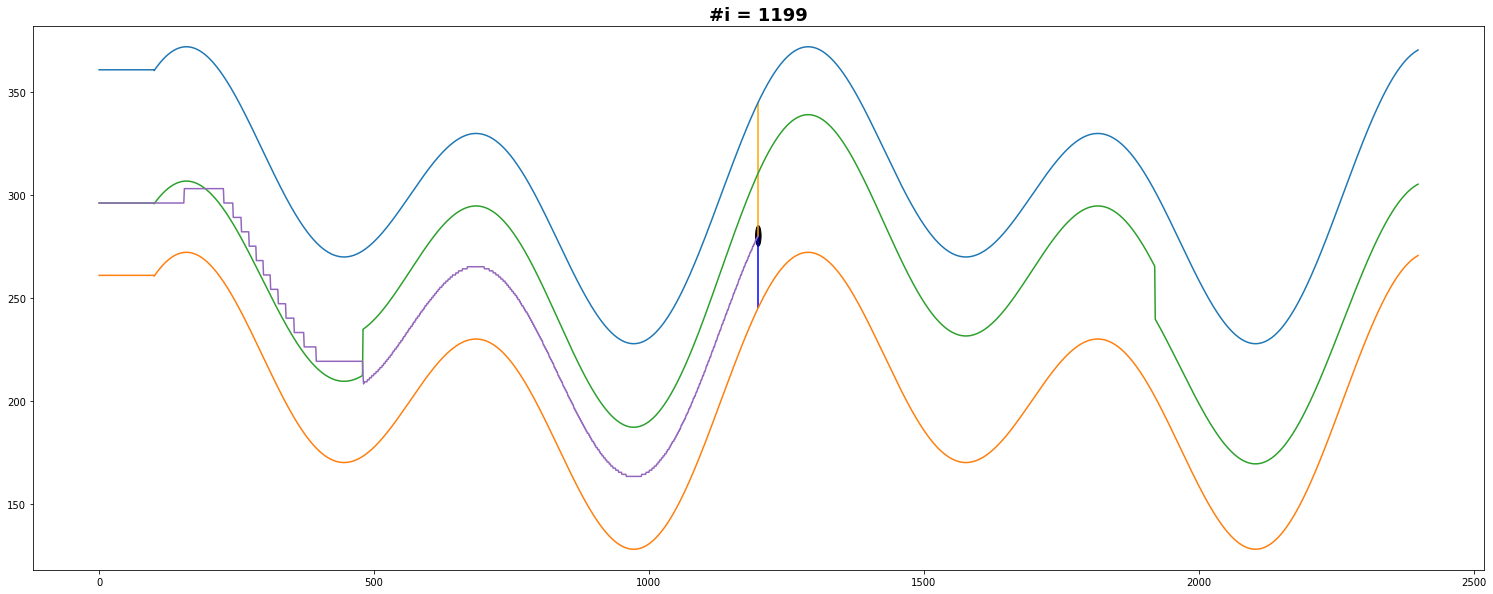

In [87]:
testAuto.plot_history(1, autoscale = True)

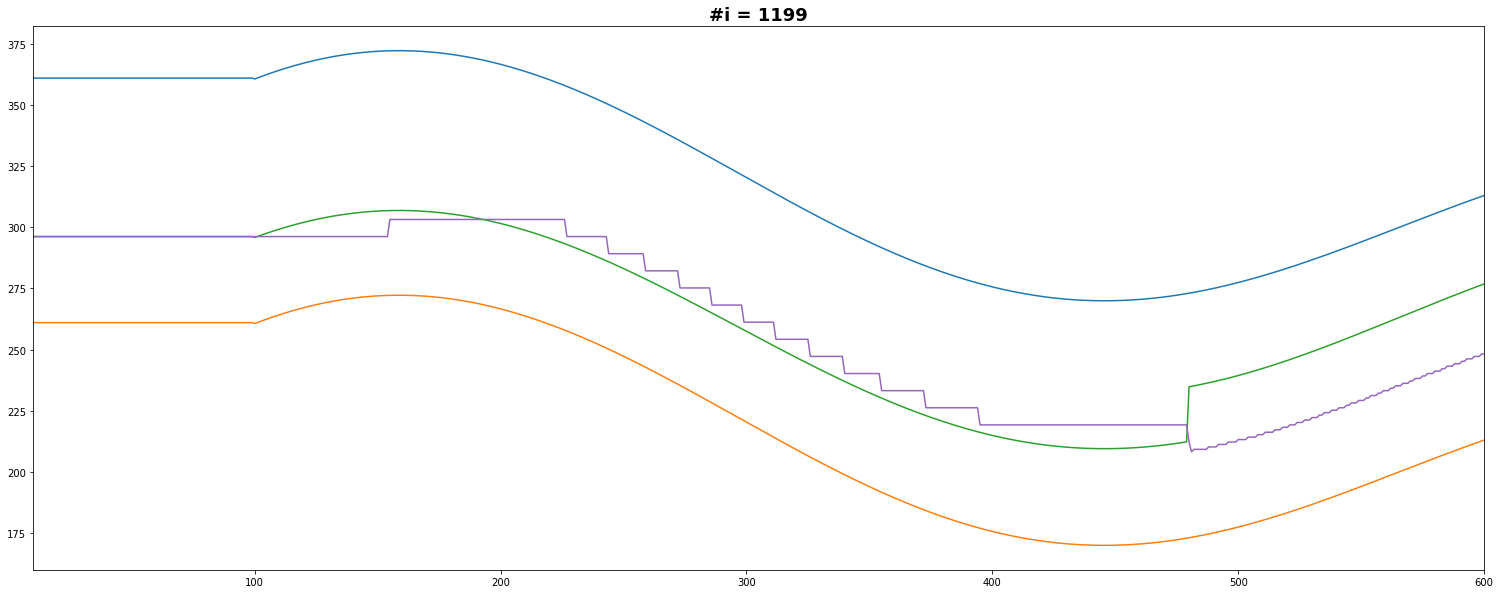

In [88]:
testAuto.plot_history_range(flag = 1, start = 10, end = 600, autoscale = True)

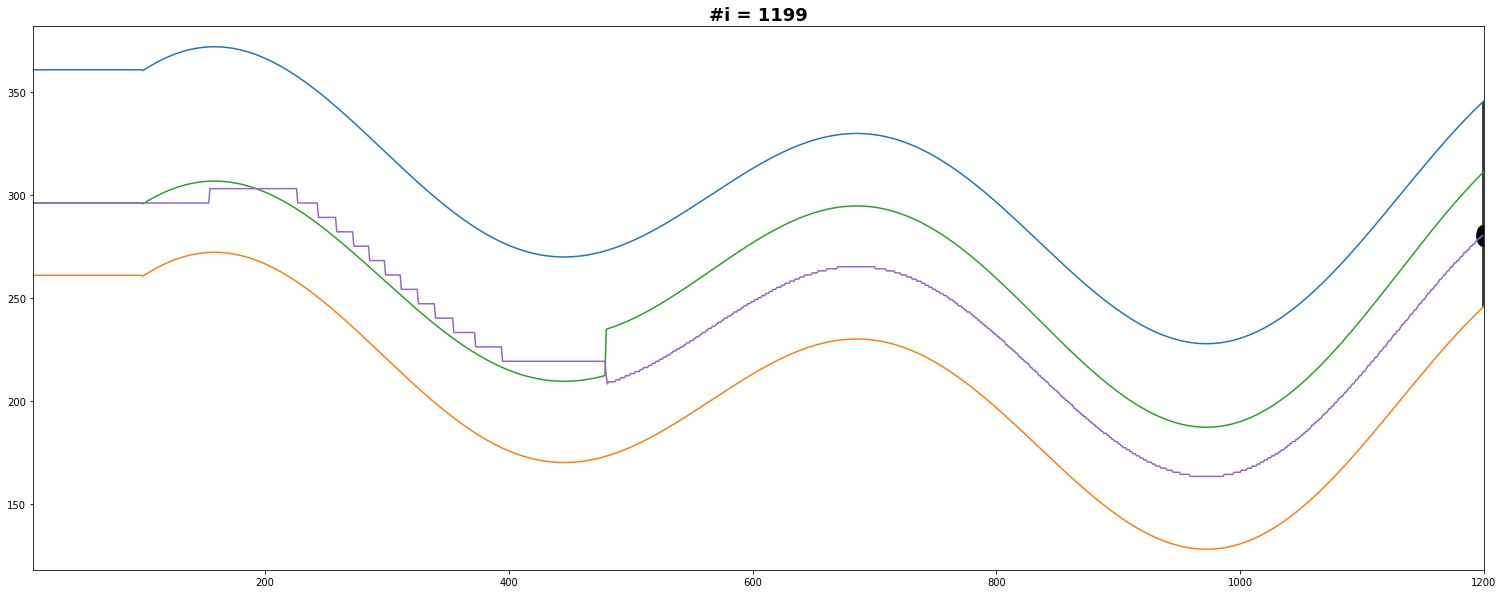

In [89]:
testAuto.plot_history_range(flag = 1, start = 10, end = 2000)

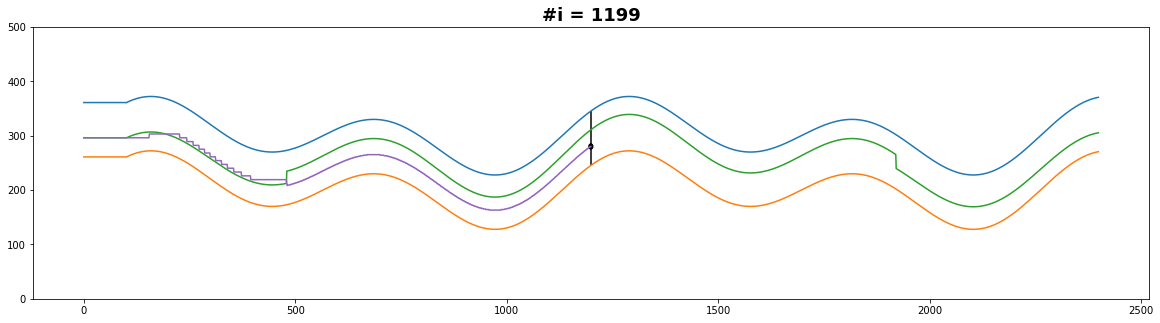

In [90]:

testAuto.plot_history_fixed(flag = 1, ymin = 0, ymax = 500, width = 20, height = 5)


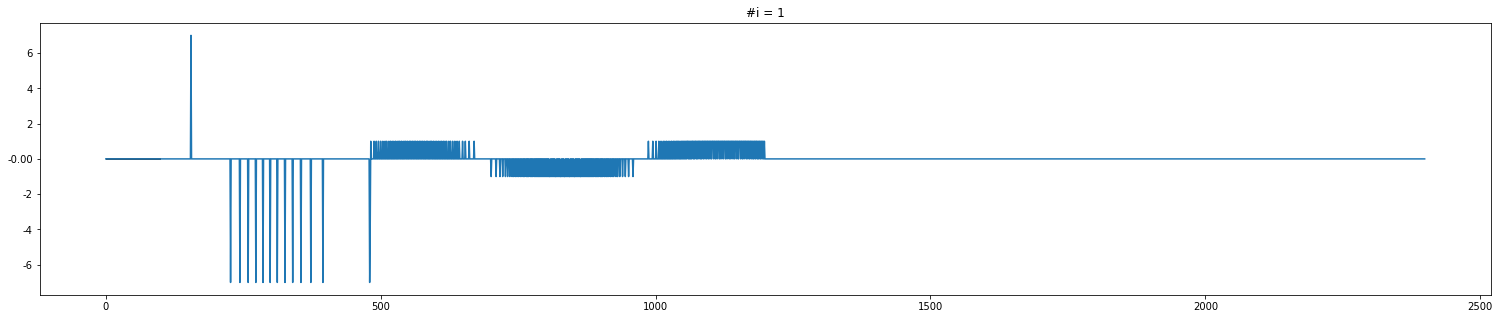

In [91]:
postPlotter = PostPlotter(testAuto)
postPlotter.plot_y_move_v2(car = testAuto, x = 1, flag = 1, height = 5)

Érdemes újra lefuttatni úg hogy a condition=1 és úgy hogy a condition=4 vagy a condition=5

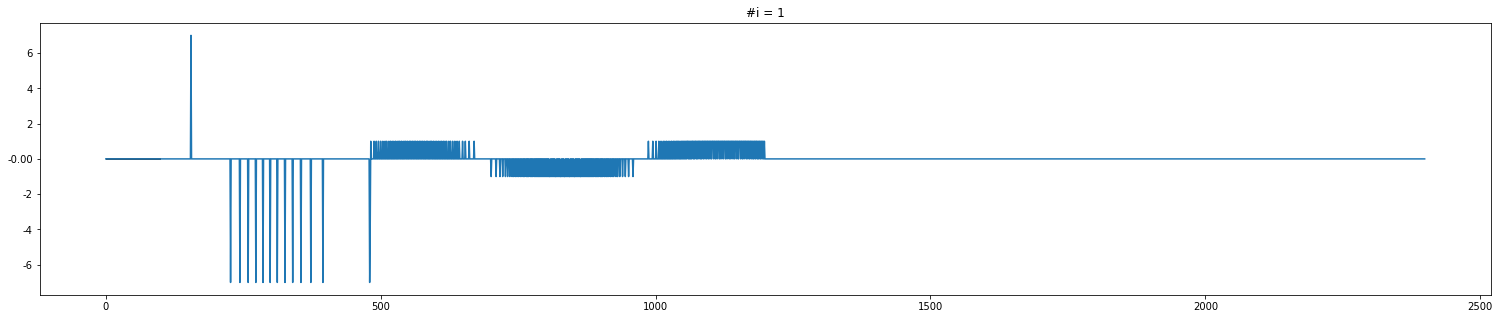

In [92]:
postPlotter = PostPlotter(testAuto)
postPlotter.plot_y_move_v2(car = testAuto, x = 1, flag = 1, height = 5)

In [93]:
# Igazából azt hiszem az utat sem kell újra megcsinálnunk, de ha később új utat szeretnénk neki adni azt itt tehetjük meg
# testRoad = Road(wide = 100, length = 3000)

testRoad = road


# A plotter objektumot sem kell újra példányosítanunk, helyette a régi plottert kapja meg
# plotter = Plotter()
# Nem csinálunk új storage objektumot, helyette a feltanítottat kapja meg
# storage = Storage()
# wwwww
testAuto = TestCar(testRoad, plotter, storage, printer)


# Test01

# testAuto.sensor_center_enable = False


testAuto.calculate_distances()

# testAuto.run(2650)

# A testAuto.run() megkaphatja paraméterként, hogy milyen feltétel alapján hívja meg az action-t

testAuto.sensor_center_enable = False

testAuto.printer._ta = True
testAuto.printer._ut = False

testAuto.run(1200, cond = 1)               # 2222222222222 -> 1(csak a 3 lépésben), 2(mindíg), 3(x<500), 4(felt.szenz), 5(felt.target)

------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  275.20679813169795
self.y új értéke   =  276.20679813169795
self.y_distance[-1]=  -31.469070930725138
action             =  1
----------------- módosítás vége ----------------- 
------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  276.20679813169795
self.y új értéke   =  278.20679813169795
self.y_distance[-1]=  -32.31163652350773
action             =  2
----------------- módosítás vége ----------------- 
------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  278.20679813169795
self.y új érté

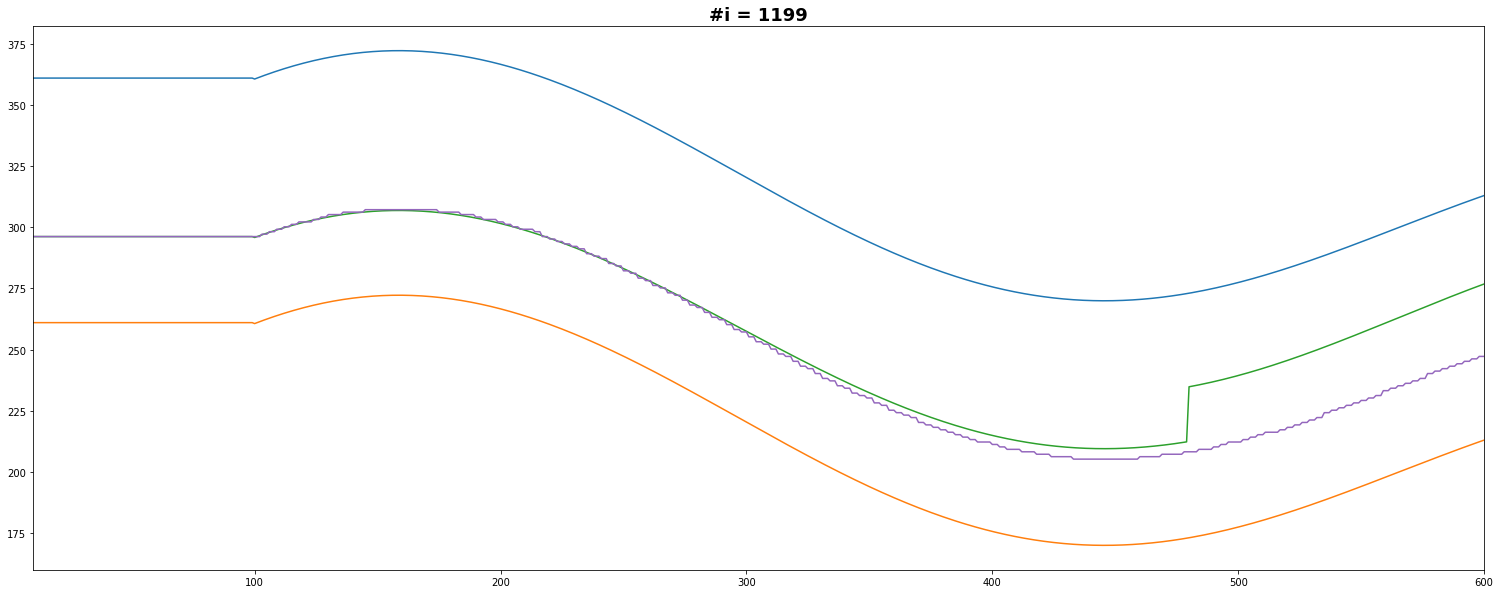

In [94]:
testAuto.plot_history_range(flag = 1, start = 10, end = 600)

# Data

In [95]:
# Egyéként ha majd azt akarom csinálni, hogy menet közben nem akarok kiprintelni semmit
# de a végén szeretnék néhány képet csinálni a meglévő függvényekkel.
# Akkor nem kell újra írnom őket, hanem a Car ojektumon átálitom a <<flag>>
# értékeket és meghívom az adott plot() függvényt valahogy így

# auto.plot_investigation_flag = 1          # 0 - disable, 1 - plot, 2 - save, 3 - both

# auto.plot_investigation_senors(_y_test_full, predicted_test_full, self.plot_investigation_flag)

# bár azért ezzel óvatósan, ki tudja mit tárolt el éppen az utolsó változó

# Zip *.png to images.zip

<a name="zip"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) zip [mp4](#mp4) [tst](#tst)


In [96]:
%%capture
! zip -0 images.zip *.png

# Csak a Google Colabon használom

# from google.colab import files

# files.download('images.zip')

# Save to MP4

A gif exportot kivettem, ha kell a régebiek között X23 megtalálható.<br>
Felváltottam az MP4 Exporttal.

<a name="mp4"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) [tst](#tst)

In [97]:
import os
import glob
import subprocess


def create_animated_mp4(filter = 'history*.png', prefix = 'ani_', framerate = 10):
  output = prefix + filter[0:filter.find('*')] + '.mp4'
  os.system("rm " + output + "  > /dev/null 2>&1")
  # os.system('rm' + output + '  > /dev/null 2>&1')
  # os.system("rm " + output)
  if( len(glob.glob(filter)) > 0 ):
    # os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec mpeg4 -y ' + output)
    # os.system('ffmpeg -r ' + str(framerate) + ' -pattern_type glob -i "' + filter + '" -vcodec libx264 -crf 25 -pix_fmt yuv420p ' + output)
    # Ezzel a kezdő fekete képek eltűnnek
    os.system('ffmpeg -r ' + str(framerate) + ' -start_number 0 -pattern_type glob -i "' + filter + '" -vcodec libx264 -crf 25 -pix_fmt yuv420p -vf "fps=25,format=yuv420p" ' + output)
    # ffmpeg -r 2 -start_number 0 -pattern_type glob -i "yDistance_vs_yDistance_predicted_type1_*.png" -vcodec libx264 -crf 25 -pix_fmt yuv420p -vf "fps=25,format=yuv420p" aproba.mp4
    print('ok')

    # rossz egyenként letöltögetni őket, ugyhogy inkább be zippelem és egyben letöltöm
    # files.download(output)
  else:
    # print('Nincsenek ilyen filok a szürési feltétel alapján -> ezért videót sem csináltunk')
    print('skipped')
    pass

In [98]:
create_animated_mp4('history*.png', 'ani_', framerate=10)

create_animated_mp4('y_move*.png', framerate=10)

create_animated_mp4('trace*.png', framerate=10)

create_animated_mp4('sensorCenterAfterScaled_vs_sensorCenterPredictedAfterScaled_S1*.png', framerate=10)
create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v1*.png', framerate=10)
create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v2*.png', framerate=10)
create_animated_mp4('sensorCenterBeforeScaled_vs_sensorCenterAfterScaled_v3*.png', framerate=10)
create_animated_mp4('sensorCenter_vs_yDistance_v1*.png', framerate=2)
create_animated_mp4('sensorLeftAfterScaled_vs_sensorLeftPredictedAfterScaled_S1*.png', framerate=10)
create_animated_mp4('sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v1*.png', framerate=10)
create_animated_mp4('sensorLeftBeforeScaled_vs_sensorLeftAfterScaled_v3*.png', framerate=10)
create_animated_mp4('sensorRightAfterScaled_vs_sensorRightPredictedAfterScaled_S1*.png', framerate=10)
create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v1*.png', framerate=10)
create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v2*.png', framerate=10)
create_animated_mp4('sensorRightBeforeScaled_vs_sensorRightAfterScaled_v3*.png', framerate=10)

create_animated_mp4('sensorRight_vs_yDistance_v1*.png', framerate=2)
create_animated_mp4('state_space_discover_LeftRightCenter_3D*.png', framerate=10)
create_animated_mp4('state_space_discover_LeftRightYDistance_3D*.png', framerate=10)
create_animated_mp4('state_space_discover_LeftRightYDistance_2D*.png', framerate=10)
create_animated_mp4('state_space_discover_LeftRightYDistance_WhitoutBorder*.png', framerate=10)

create_animated_mp4('yDistance_vs_yDistance_predicted_type0*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type1*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type2*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type3*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type4*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_type5*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_typeWrong*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_typeCorrect_bw*.png', framerate=2)
create_animated_mp4('yDistance_vs_yDistance_predicted_typeCorrect_col*.png', framerate=2)


create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v1*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v2*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v3*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v4*.png', framerate=10)
create_animated_mp4('state_space_discover_new_plotter_LeftRightYDistance_3D_v5*.png', framerate=10)


create_animated_mp4('timeline_sensors_v1*.png', framerate=10)

create_animated_mp4('ANN_*.png', framerate=10)

create_animated_mp4('Plot3D*.png', framerate=10)

create_animated_mp4('PostPlotter_3D_MLP_Prediction*.png', framerate=10)


skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped
skipped


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

ok
ok
skipped
skipped


frame=   35 fps=0.0 q=-1.0 Lsize=     154kB time=00:00:01.28 bitrate= 985.5kbits/s speed=3.43x    
video:153kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.813876%
[libx264 @ 0x5593a7ad73c0] frame I:1     Avg QP:17.54  size: 12521
[libx264 @ 0x5593a7ad73c0] frame P:9     Avg QP:27.91  size: 10743
[libx264 @ 0x5593a7ad73c0] frame B:25    Avg QP:26.27  size:  1861
[libx264 @ 0x5593a7ad73c0] consecutive B-frames:  2.9%  5.7%  0.0% 91.4%
[libx264 @ 0x5593a7ad73c0] mb I  I16..4: 59.3% 17.7% 23.0%
[libx264 @ 0x5593a7ad73c0] mb P  I16..4:  1.6%  6.8%  9.4%  P16..4:  7.9%  6.4%  2.7%  0.0%  0.0%    skip:65.3%
[libx264 @ 0x5593a7ad73c0] mb B  I16..4:  0.5%  0.4%  0.8%  B16..8: 17.3%  1.8%  0.6%  direct: 0.2%  skip:78.3%  L0:51.8% L1:46.4% BI: 1.8%
[libx264 @ 0x5593a7ad73c0] 8x8 transform intra:29.3% inter:9.0%
[libx264 @ 0x5593a7ad73c0] coded y,uvDC,uvAC intra: 28.2% 30.1% 29.4% inter: 2.5% 2.2% 1.8%
[libx264 @ 0x5593a7ad73c0] i16 v,h,dc,p: 64% 29%  7%  0%
[lib

In [99]:
%%capture
! zip -0 ani.zip *.mp4

# Csak a Google Colabon használom

# files.download('ani.zip')

# !rm *.png *.mp4

# !unzip images.zip

# Test Auto

<a name="tst"></a> [set](#set) [exp](#exp) [run](#run) [dev](#dev) [pst](#pst) [str](#str) [zip](#zip) [mp4](#mp4) tst

In [100]:
# Save

# Via storage object -> passing a car object
storage.save_mlp_from_object(auto)
storage.save_regression_from_object(auto)
storage.save_minmaxscaler_from_object(auto)

# Via auto.storage object -> passing a car object and its property fields
#  -> this can be used inside the car.run() methos as well
auto.storage.save_mlp(auto.mlp)
auto.storage.save_minmaxscaler(auto.x_minmaxscaler, auto.y_minmaxscaler)
auto.storage.save_regression(auto.regression_left, auto.regression_center, auto.regression_right)

# Both, the storage and the auto.storage has the same refrence, so it works back and forth

# ----------------------------------------------------------------------------------------

# Load

# Via storage object -> these are void methods but updates its own self.property fields which later can be called such 'storage.mlp', 'storage.regression_left'
storage.load_mlp()
storage.load_regression()
storage.load_minmaxscaler()


# Via car object -> these are the same as above (as storage is a property of the car object) -> works as a static void or a vodi setter
auto.storage.load_mlp()
auto.storage.load_regression()
auto.storage.load_minmaxscaler()
# Both, the storage and the auto.storage has the same refrence, so it works back and forth


# Ez viszont csak az auto objektumon kereszül érhető el és nem perzistens, gyakorlatilag ezt mentjük el és ezt váltjuk ki a betöltéssel, ha van mit betölteni
auto.mlp

# Ha el lett menteve akármelyik módszerrel
storage.save_mlp_from_object(auto)
auto.storage.save_mlp(auto.mlp)
# Akkor utána elérhető akár az auto.storage objektumon keresztül
auto.storage.mlp
# Akár a storage objektumon keresztül, mert minkettőnek ugyan az a referenciája
storage.mlp

# lényegében ha a storage load megtörtént akkor ezt kell használnom a tesztautóban
# a tesztautó példányosításnál kapja meg a storage-ot és az __init__-ben híja
# meg a load_all metodust

# tanuló car (auto) pedig a futás végén hívja meg a storage save_all metodust
# ezzel gyakorlatilag kiírja minden modelt amit majd a teszt autó be tud olvasni




MLPRegressor(activation='tanh', hidden_layer_sizes=(5, 5),
             learning_rate_init=0.01, max_iter=1, n_iter_no_change=98765000,
             random_state=1, shuffle=False, solver='sgd',
             validation_fraction=0.0, verbose=True, warm_start=True)

In [101]:
# Igazából azt hiszem az utat sem kell újra megcsinálnunk, de ha később új utat szeretnénk neki adni azt itt tehetjük meg
# road = Road(wide = 100, length = 3000)


testRoad = road

# A plotter objektumot sem kell újra példányosítanunk, helyette a régi plottert kapja meg
# plotter = Plotter()
# Nem csinálunk új storage objektumot, helyette a feltanítottat kapja meg
# storage = Storage()
testAuto = TestCar(testRoad, plotter, storage, printer)

testAuto.calculate_distances()
testAuto.plot_history(1)

testAuto.sensor_center_enable = False

testAuto.printer._ta = True
testAuto.printer._ut = False

testAuto.run(900, cond=5)

------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  184.20679813169795
self.y új értéke   =  183.20679813169795
self.y_distance[-1]=  -24.17858421480659
action             =  -1
----------------- módosítás vége ----------------- 
------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  183.20679813169795
self.y új értéke   =  183.20679813169795
self.y_distance[-1]=  -24.701854957547567
action             =  0
----------------- módosítás vége ----------------- 
------------------------------ IF i % 3 > 0 ------------------------------ 
=================== TAKE ACTION =================== 
-------- ennyivel módosítom self.y értékét -------- 
self.y régi értéke =  183.20679813169795
self.y új ért

## Itt hasonlítom össze a testAuto futási eredményeit

By the way -> kis zavar lehet az erőben, hogy mikor melyik objektumon melyik metodust használom.

1. Car objektumnak vannak bizonyos plot funkcói.<br>
Főként azokat tettem ide amelyekből animációt akarok csinálni, vagy futás közben is akarom látni a kimenetüket.

2. Car objektum példányosításnál kap egy Plotter objektumot.<br>
Ennek az volt az elsődleges célja, hogy kivezessem a Car osztályból a Plot funkciókat.<br>
A Plotter osztály olyan faramucin lett megírva, hogy a metodusai és azok szignaturája elég változatos és specifikus. Tulajdonképpen itt is arról van szó, hogyha valamit menet közben és többször is ki akarok plottoltani, akkor annak a Car objektumban kell lennie.

3. PostPlotter osztály viszont egy Car objektumot kap és minden metodusa úgy van megírva, hogy a Car objektumból olvassa ki az adatokat. Ezzel a módszerrel a futás utáni eredményeket akartam megjeleníteni. 

> **Lényegében:** A Car vagy TestCar osztályba marha kényelmes plot fügvényeket tenni, csak nem célszerű. Mert fejlesztésnél akár hányszor átirom őket újra kell példányosítanom magát az objektumot és azzal együtt elveszik minden benne tárolt adat - Sajnos ez akkor sem lesz jobb ha kiszervezem ezeket a Plotter osztályba mert azt is Car és a TestCar osztály kapja meg. Erre van a PostPlotter osztály ami egy Car objektumot vár. Ha már jó és beállítottam mindent egy adott plot metoduson utána átrakhatom a Plotter osztályba, fejlesztés alatt viszont a PostPlotter osztályban van.

Végeredményben elég lenne a Plotter osztály és a másik ket megoldást (PostPlotter és hogy a Car objektumank vannak plot metodusai) ki kellene vezetni.

self.distance_right_from_wall =  -35.75459444030207
self.distance_left_from_wall  =  -64.24540555969793


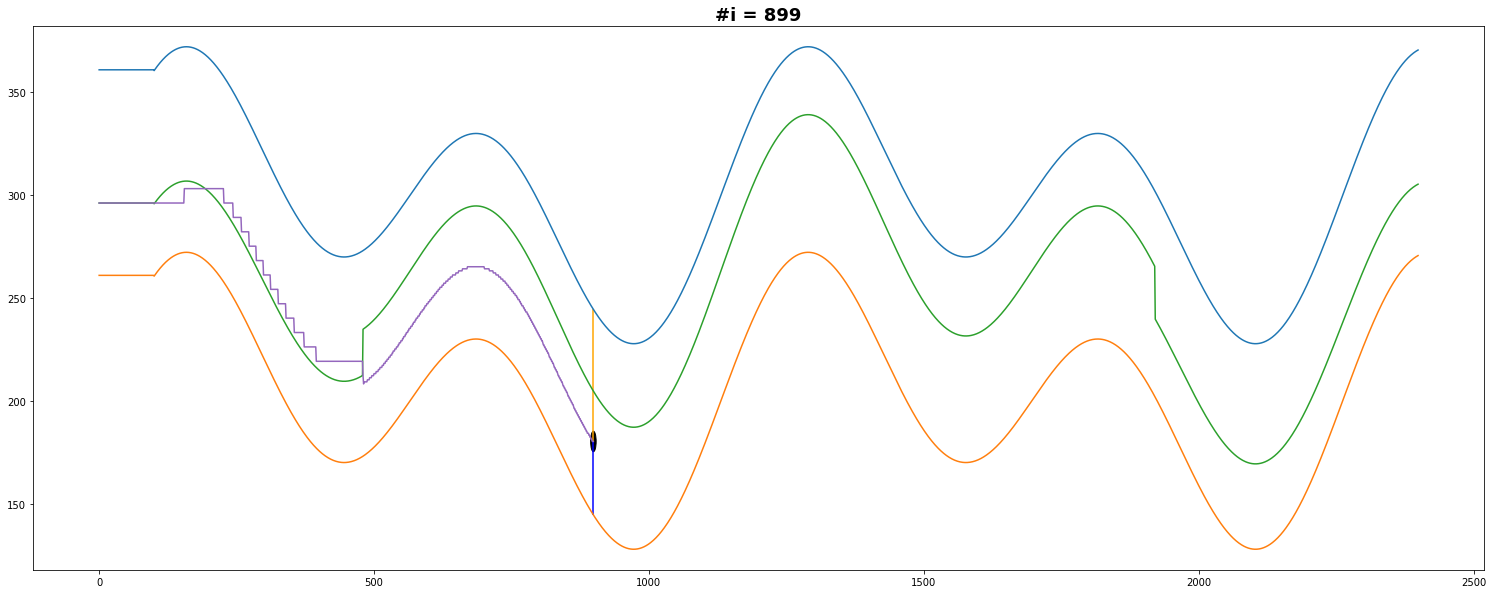

In [102]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
testAuto.plot_history(1)

self.distance_right_from_wall =  -35.75459444030207
self.distance_left_from_wall  =  -64.24540555969793


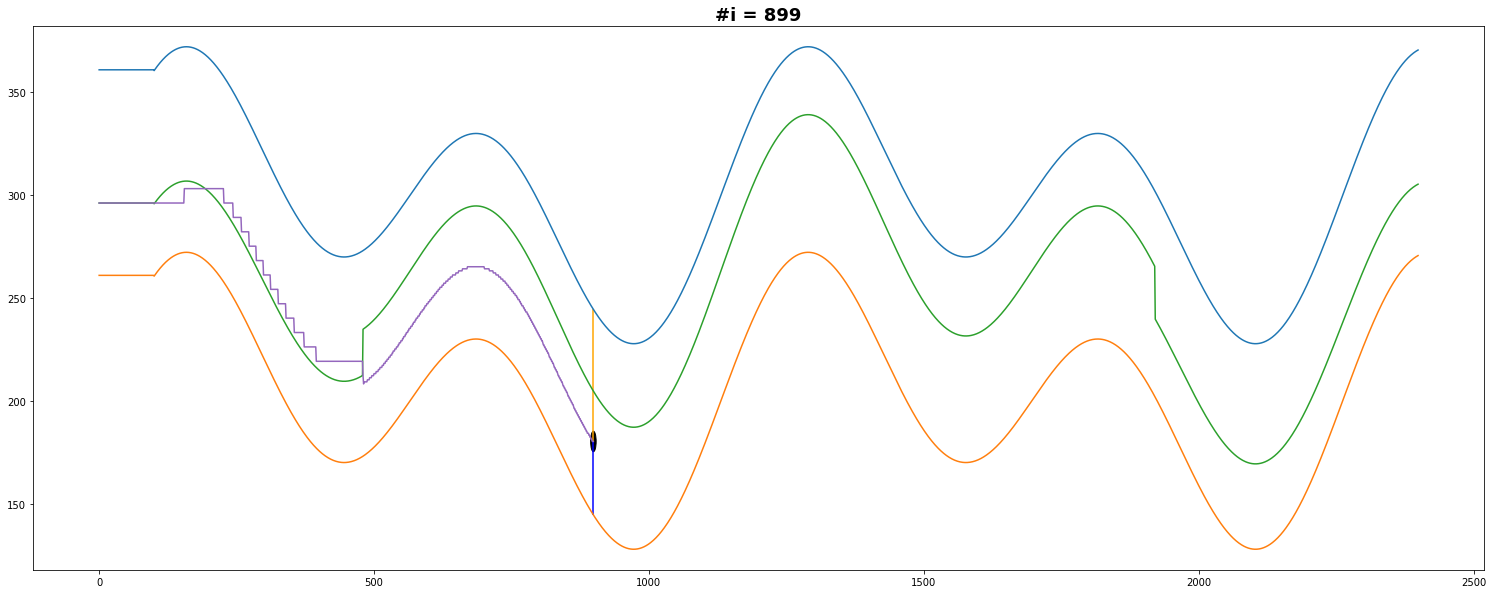

In [103]:
# Nem post plotter, hanem az auto.plot_history(flag = 1)
testAuto.plot_history(1)

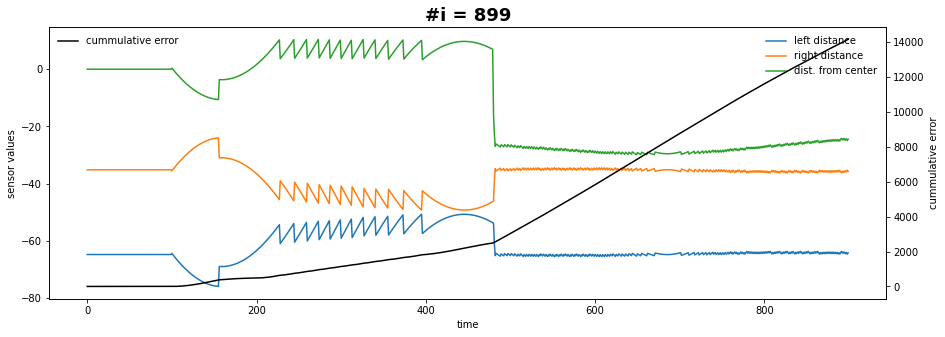

In [104]:
testAuto.plotter.test_plot2(testAuto.sensor_left, testAuto.sensor_right, testAuto.y_distance, testAuto.x, 1, [99])

In [105]:
# cummulativ error utolsó értéke

print(
    np.cumsum(np.abs(testAuto.y_distance))[-1]
)


# max legnagyobb lépés a futás során

tmp = np.diff(np.array(testAuto.y_history), 1, -1, prepend=0)
tmp[0] = 0
max_action_value = np.array(tmp).max()
print(
    max_action_value
)

14153.82892986869
7.0


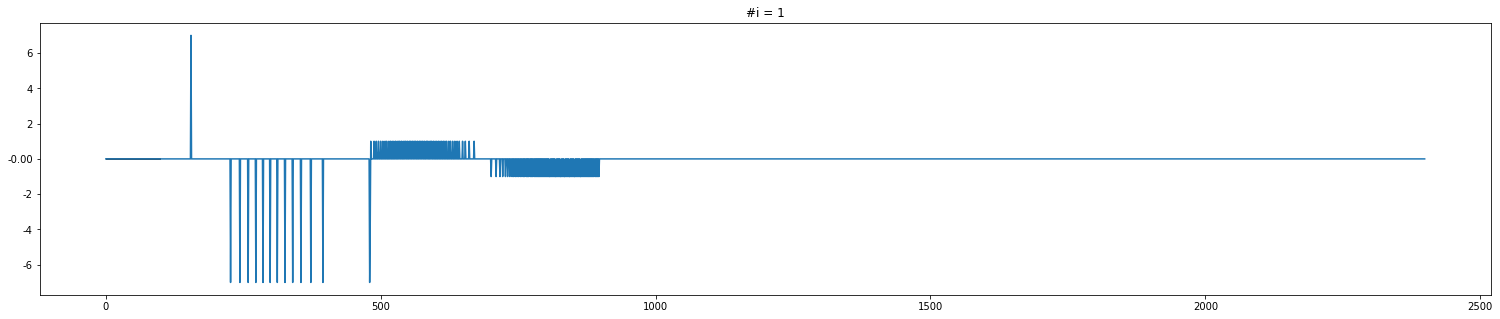

In [106]:
postPlotter = PostPlotter(testAuto)
postPlotter.plot_y_move_v2(car = testAuto, x = 1, flag = 1, height = 5)

# Legacy
# testAuto.plotter.plot_y_move(testAuto.y_history, testAuto.x, 1)

In [107]:
%%capture
! rm images.zip
! zip -0 images.zip *.png

# Csak a Google Colabon használom
# files.download('images.zip')

create_animated_mp4('test_history*.png', 'ani_', framerate=10)

%%capture
! zip -0 ani.zip *.mp4

# Csak a Google Colabon használom
# files.download('ani.zip')

<a name="irodalom"></a>

# Felhasznált irodalom és internetes cimek

Itt gyűjtöttem össze a menet közben összegyűjt okosságokat

[vissza a tartalomhoz](#tartalom)<br>


Random Walk - Wikipedia
<br>
https://en.wikipedia.org/wiki/Random_walk

Random Walks : The Properties, Applications
and Methods of Analysis
<br>
https://fse.studenttheses.ub.rug.nl/22617/1/bMATH_2020_HillAF.pdf


Black–Scholes model
<br>
https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model


Share price
<br>
https://en.wikipedia.org/wiki/Share_price

Correlations in Economic Time Series
<br>
https://arxiv.org/abs/cond-mat/9706021


Self-similar process
<br>
https://en.wikipedia.org/wiki/Self-similar_process


Heavy-tailed distribution
<br>
https://en.wikipedia.org/wiki/Heavy-tailed_distribution


Seven states of randomness
<br>
https://en.wikipedia.org/wiki/Seven_states_of_randomness


The Black Swan: The Impact of the Highly Improbable
<br>
https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable


Long tail
<br>
https://en.wikipedia.org/wiki/Long_tail


Gauss–Markov process
<br>
https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_process


Probability theory
<br>
https://en.wikipedia.org/wiki/Probability_theory


Time series
<br>
https://en.wikipedia.org/wiki/Time_series


Forecasting
<br>
https://en.wikipedia.org/wiki/Forecasting


Bernoulli process
<br>
https://en.wikipedia.org/wiki/Bernoulli_process


Binomiális tétel
<br>
https://hu.wikipedia.org/wiki/Binomi%C3%A1lis_t%C3%A9tel


Pascal-háromszög
<br>
https://hu.wikipedia.org/wiki/Pascal-h%C3%A1romsz%C3%B6g


Binomiális együttható
<br>
https://hu.wikipedia.org/wiki/Binomi%C3%A1lis_egy%C3%BCtthat%C3%B3


Bachelier model
<br>
https://en.wikipedia.org/wiki/Bachelier_model


Louis Bachelier
<br>
https://en.wikipedia.org/wiki/Louis_Bachelier


Wiener process
<br>
https://en.wikipedia.org/wiki/Wiener_process


Gaussian process
<br>
https://en.wikipedia.org/wiki/Gaussian_process


Markov additive process
<br>
https://en.wikipedia.org/wiki/Markov_additive_process


Olvasmány - éé
<br>
https://thesublimeblog.org/2020/07/29/games-of-chance-i-how-probability-revolutionalized-finance/


Olvasmány - Louis Bachelier's "Theory of Speculation"
<br>
https://f-origin.hypotheses.org/wp-content/blogs.dir/1596/files/2014/12/Mark-Davis-Talk.pdf


------------

Scikit-learn - MLPRegressor API
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


Fogalmak és probléma meghatározás
<br>
https://www.rubrik.com/blog/architecture/20/12/customized-autoscaling--minimize-your-cloud-cost


https://github.com/kubernetes/autoscaler/blob/master/cluster-autoscaler/FAQ.md#what-are-the-parameters-to-ca

https://arxiv.org/pdf/1608.04030.pdf

Metrikák amivel a szollgáltatás minőségét mérik különböző esetekben
<br>
https://blog.avinetworks.com/autoscaling-metrics

------------

NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


Python Logger API Reference Guide
<br>
https://docs.python.org/3/howto/logging-cookbook.html#logging-cookbook


Python Logger API Tutorial
<br>
https://coralogix.com/blog/python-logging-best-practices-tips


PyPlot Colorbar Tutorial
<br>
https://matplotlib.org/stable/tutorials/colors/colorbar_only.html


PyPlot Subplot Tutorial
<br>
https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html


Scikit Learn ONYX Save model
<br>
http://onnx.ai/sklearn-onnx


Scikit Learn Save Model
<br>
https://stackabuse.com/scikit-learn-save-and-restore-models

------------

Scikit learn API Warm_start and Partial_fit
<br>
https://newbedev.com/what-is-the-difference-between-partial-fit-and-warm-start


Online learning
<br>
https://www.dummies.com/programming/big-data/data-science/tips-for-dealing-with-big-data-in-python/


Online learning
<br>
https://dziganto.github.io/data%20science/online%20learning/python/scikit-learn/An-Introduction-To-Online-Machine-Learning/


------------

Huber Loss
<br>
https://en.wikipedia.org/wiki/Huber_loss


Gradient Descent - van benne egy tök jó animáció - emlékszem amikor az első ilyet írtam 10 éve
<br>
https://en.wikipedia.org/wiki/Gradient_descent


Online Learning
<br>
https://en.wikipedia.org/wiki/Online_machine_learning


Ezen tök jól lehet demonstrálni, hogy miért tanul gyorsan a 'relu', gyorsabban a 'tanh' és lassan a 'logistic' azonos beállítások mellett, habár végül midhárom közel azonos eredményre vezet
<br>
https://playground.tensorflow.org

-------------------

Wow
<br>
https://matplotlib.org/devdocs/gallery/mplot3d/voxels_numpy_logo.html

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2F0FSLf.png&imgrefurl=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F48672663%2Fmatplotlib-render-all-internal-voxels-with-alpha&tbnid=ug0Bk5AvbBFGoM&vet=12ahUKEwiF_vrC0d7zAhUfiv0HHZkkCD4QxiAoA3oECAAQIw..i&docid=lv23pEYcw_qlvM&w=465&h=367&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwiF_vrC0d7zAhUfiv0HHZkkCD4QxiAoA3oECAAQIw">Google search</a>

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2FvLogW.png&imgrefurl=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F48672663%2Fmatplotlib-render-all-internal-voxels-with-alpha&tbnid=jmhk8RQrADn_iM&vet=12ahUKEwivwqC44d7zAhUH8LsIHWVICYkQxiAoAHoECAAQEQ..i&docid=lv23pEYcw_qlvM&w=428&h=352&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwivwqC44d7zAhUH8LsIHWVICYkQxiAoAHoECAAQEQ">Google search</a>

Wow - Nice Pyplot Graphics
<br>
<a href="https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.researchgate.net%2Fprofile%2FAndrew-Thompson-21%2Fpublication%2F256099533%2Ffigure%2Ffig2%2FAS%3A601596220153863%401520443124187%2FThree-possible-2D-views-of-a-3D-surface-representing-the-response-to-two-drugs-A.png&imgrefurl=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FThree-possible-2D-views-of-a-3D-surface-representing-the-response-to-two-drugs-A_fig2_256099533&tbnid=PCWbaGIBwOUEqM&vet=12ahUKEwjU5bet0d7zAhUZ8rsIHQuQDVAQxiAoBXoECAAQGQ..i&docid=sbOccjnKSDRdPM&w=850&h=1014&itg=1&q=pyplot%203d%20plot%20wall&ved=2ahUKEwjU5bet0d7zAhUZ8rsIHQuQDVAQxiAoBXoECAAQGQ">Google search</a>

-----------

PyPlot - Memory issue and its solution
<br>
https://www.py4u.net/discuss/208758

```
JoDeMiro - What else^^^˘˘°°˛˛˛
```